1. ## Introduction
- 1.1 Problem Statement
- 1.2 Business Goal
- 1.3 Data Dictionary
2. ## Python Libraries
- 2.1 Import Python Libraries
- 2.2 Suppress Warnings
- 2.3 Setting up Jupyter View
3. ## Reading & Understanding the data
- 3.1 Importing the input file
- 3.2 Inspecting the dataframe
- 3.3 Null Value Calculation
- 3.4 Duplicate Analysis  duplicate
4. ## Data Cleaning
- 4.1 Delete High Null Columns
- 4.2 Segregating Categorical & Numerical Value
- 4.3 Categorical Columns Null Value Treatment
- 4.4 Numerical Columns Null Value Treatment
5. ## Exploratoray Data Analysis
- 5.1 Data Imbalance
- 5.2 Graph Functions
- 5.3 Univariate Analysis
- 5.4 Univariate Analysis
- 5.5 Bivariate Analysis
6. ## Data Preparation
- 6.1 Outliers Treatment
- 6.2 Convert Binary Categories
- 6.3 Dummy Variables
- 6.4 Train - Test Split
- 6.5 Feature Scaling
7. ## Model Building
- 7.1 RFE for Feature Reduction
- 7.2 Manual Feature Reduction
8. ## Model Evalution : Train Dataset
- 8.1 Evaluation Matrix Definitions
- 8.2 Predicted Probability Calculation
- 8.3 Confusion Matrix
- 8.4 ROC Curve
- 8.5 Precision - Recall Trade off
9. ## Model Evalution : Test Dataset
10. ## Conclusion
- 10.1 Model Features / Predictors


# 1.1 `Problem Statement`



An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

# 1.2 Bussiness Goal

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goal of the Case Study is :

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# 1.3  Data Dictionary 


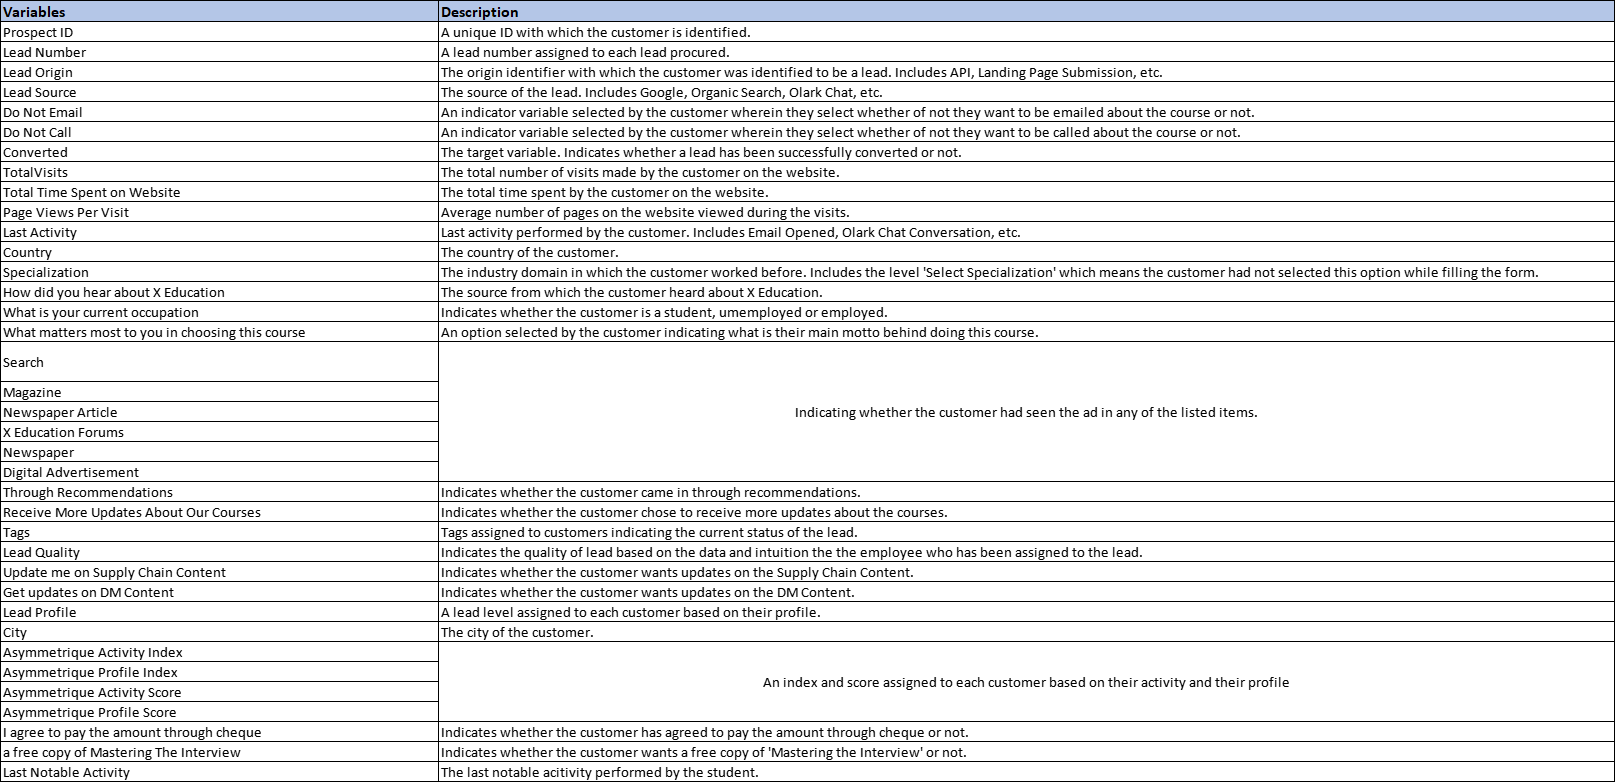

# 2.0 `Importing The Important Libraries`

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import  statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 3.1 `Reading The Dataset`

In [2]:
lead_score=pd.read_csv('Leads.csv')
pd.set_option('max_columns', 37)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


 # 3.2 `Inspecting the dataframe`

### `Shape of Dataset` 

In [3]:
lead_score.shape

(9240, 37)

### `Checking The Datatype Of Each Columns`

In [4]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- We see that  many of the columns have `Missing Value` and many of the columns are in `Object` nature type

### `Statistical Summary Of The Dataset`
- `For Numerical Columns`

In [5]:
lead_score.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


 - we have to  review `totalVists` and `Total Time Spent on Website` column

- `For Categorial Columns` 

In [6]:
lead_score.describe(include='object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,810da54a-7432-421c-9f74-477d5d0749f0,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


- Here Two columns has `Asymmetrique Activity Index` and `Asymmetrique Profile Index` which is combination of number and string. that should be string only 

# 3.3 `Null Value Calculation`

## `Missing Value In Each column`

In [7]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are quite a few columns which has 'Select' as one of the category. This is most probably because the person has not filled that field. We will replace this field with NaN

In [8]:
lead_score=lead_score.replace('Select',np.nan)

In [9]:
d={}
a=[]
b=[]
c=[]
for i in  lead_score.columns:
    c.append(i)
    s1=lead_score[i].isnull().sum()
    a.append(s1)
    s2=round((s1/len(lead_score[i]))*100,2)
    b.append(s2)
d['columns']=c
d['total_no_of_missing_value']=a
d['percent_of missing_value']=b
percent_na=pd.DataFrame(d)
percent_na

,columns,total_no_of_missing_value,percent_of missing_value
0,Prospect ID,0,0.00
1,Lead Number,0,0.00
2,Lead Origin,0,0.00
3,Lead Source,36,0.39
4,Do Not Email,0,0.00
5,Do Not Call,0,0.00
6,Converted,0,0.00
7,TotalVisits,137,1.48
8,Total Time Spent on Website,0,0.00
9,Page Views Per Visit,137,1.48


- `Lead Quality` columns highest number of missing values
- `Lead Score` columns lowest number of missing values


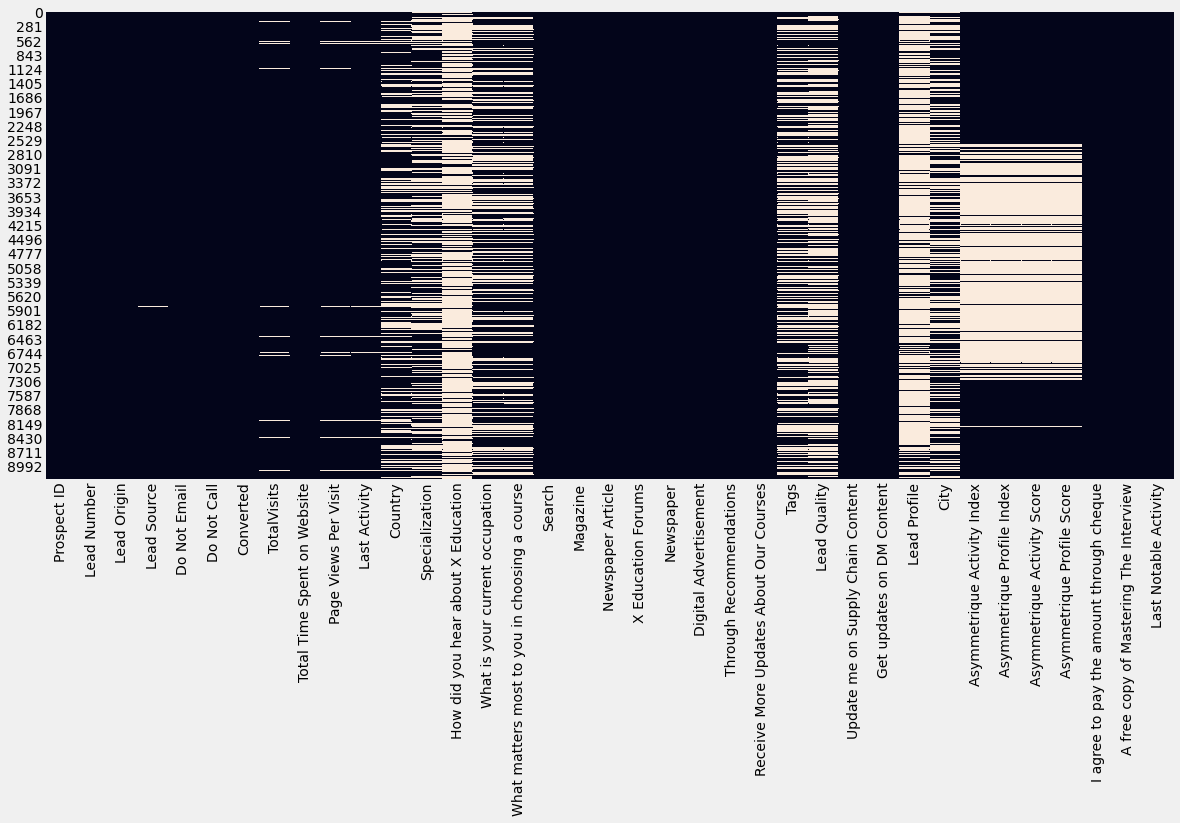

In [10]:
plt.figure(figsize = (18,8))
sns.heatmap(lead_score.isnull(),cbar = False)
plt.show()

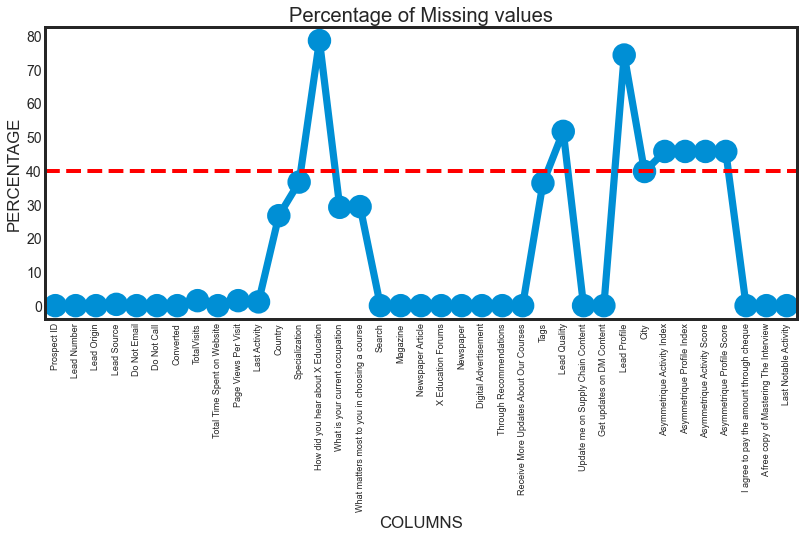

In [11]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((lead_score.isnull().sum())*100/lead_score.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

There are 17 columns with null values. 7 columns have more than 40% unknowns which we should drop as imputing these columns will introduce bias. 

## 3.4  Duplicate Analysis duplicate

In [12]:
print("Total number of duplicate values in Prospect ID column :" , lead_score.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead_score.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


Both the Prospect ID and Lead number are unique columns and hence we wont need for prediction

 # 4.0 `Data Cleaning` 

## 4.1 `Delete High Null Columns`

 We will remove the columns which has more than 40% Null Values.


In [13]:
col=percent_na[percent_na['percent_of missing_value']>=40]
col

,columns,total_no_of_missing_value,percent_of missing_value
13,How did you hear about X Education,7250,78.46
25,Lead Quality,4767,51.59
28,Lead Profile,6855,74.19
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
33,Asymmetrique Profile Score,4218,45.65


In [14]:
lead_score.drop(col['columns'],inplace=True,axis=1)

In [15]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


- Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.Also, some of the variables like Lead Quality, Tags, Asymmetrique scores and profile etc. are created by the sales team once they contact the potential lead. These variables will not be available for the model building as these features would not be available before the lead is being contacted.
- Last Notable Activity is an intermediate column which is an update while the sales team representative is in touch with the lead.
- Thus, we can drop these columns too.

In [16]:
lead_score.drop(['Prospect ID','Lead Number','Tags','Last Notable Activity'],axis=1,inplace=True)

In [17]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


`We have suceessfully deleted 10 columns where the columns had high null values or they are information which will not be available for models when it ran as they are calculated / selected by sales personnel when they contact potential leads`.

## 4.2 `Segregating The Categorical & Numerical Columns`

In [18]:
numerical_columns=lead_score.select_dtypes(include=['number']).columns.to_list()
categoriacl_columns=lead_score.select_dtypes(exclude=['number']).columns.to_list()
print('Numerical Columns : ',numerical_columns)
print('Categorical Columns : ',categoriacl_columns)

Numerical Columns :  ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
Categorical Columns :  ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


## 4.3  `Categorical Column Null Value Treatment`

In [19]:
cat_null=pd.DataFrame(columns=['Column_name','Labels','No_of_labels','Missing_Value','Percentage_of_Missing_Value'])


In [20]:
def categorical_missing(lead,col):
    df=pd.DataFrame()
    for i in col:
        cat_null['Column_name']=i
        cat_null['Labels']=[lead_score[i].unique()]
        cat_null['No_of_labels']=lead_score[i].nunique()
        cat_null['Missing_Value']=lead_score[i].isna().sum()
        cat_null['Percentage_of_Missing_Value']=round((lead_score[i].isna().sum()/len(lead_score)*100),2)
        df=df.append(cat_null)
    df=df.reset_index(drop=True).sort_values('Percentage_of_Missing_Value',ascending=False)
    return df

In [21]:
categorical_missing(lead_score,categoriacl_columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
19,City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.71
6,Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.58
8,What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.32
7,What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.11
5,Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.63
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.11
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.39
0,NaN,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.00
14,Digital Advertisement,"[No, Yes]",2,0,0.00
20,I agree to pay the amount through cheque,[No],1,0,0.00


## `Delete The Columns Which have only 1 Labels`

Some of the columns have only 1 category.Example - Magazine,I agree to pay the amount through cheque etc. These columns will not add any value to the model and can be deleted.


In [22]:
df1=categorical_missing(lead_score,categoriacl_columns)
One_label_col=df1[df1['No_of_labels']==1]['Column_name']
lead_score.drop(One_label_col,inplace=True,axis=1)

In [23]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No


In [24]:
categorical_missing(lead_score,lead_score.select_dtypes(exclude='number').columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
15,City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.71
6,Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.58
8,What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.32
7,What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.11
5,Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.63
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.11
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.39
11,X Education Forums,"[No, Yes]",2,0,0.00
14,Through Recommendations,"[No, Yes]",2,0,0.00
13,Digital Advertisement,"[No, Yes]",2,0,0.00


## 1) `City Column`

In [25]:
lead_score['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
(lead_score['City'].value_counts(normalize=True)*100).round(1)

Mumbai                         57.8
Thane & Outskirts              13.5
Other Cities                   12.3
Other Cities of Maharashtra     8.2
Other Metro Cities              6.8
Tier II Cities                  1.3
Name: City, dtype: float64

In [27]:
def Countplot(data,col):
    data=data
    plt.figure(figsize=(13,6))
    sns.countplot(data[col],palette='Set2')
    plt.xticks(rotation=90)
    plt.show()

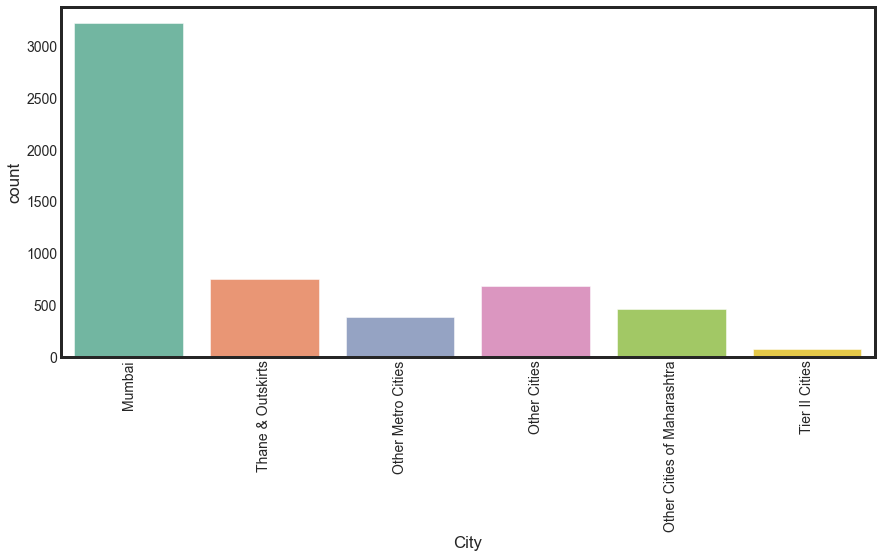

In [28]:
Countplot(lead_score,'City')

As there is almost 40% unknown values, we cannot impute with mode as it is make the whole data skewed. Also, X-Education is online teaching platform. The city information will not be much useful as potential students can available any courses online despite their city. We will drop the column from analysis.


In [29]:
lead_score['City'].isna().sum()

3669

In [30]:
lead_score.drop('City',1,inplace=True)
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No


 ## 2) `Specialization Column`

In [31]:
lead_score['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [32]:
(lead_score['Specialization'].value_counts(normalize=True)*100).round(1)

Finance Management                   16.7
Human Resource Management            14.5
Marketing Management                 14.3
Operations Management                 8.6
Business Administration               6.9
IT Projects Management                6.2
Supply Chain Management               6.0
Banking, Investment And Insurance     5.8
Media and Advertising                 3.5
Travel and Tourism                    3.5
International Business                3.0
Healthcare Management                 2.7
Hospitality Management                1.9
E-COMMERCE                            1.9
Retail Management                     1.7
Rural and Agribusiness                1.2
E-Business                            1.0
Services Excellence                   0.7
Name: Specialization, dtype: float64

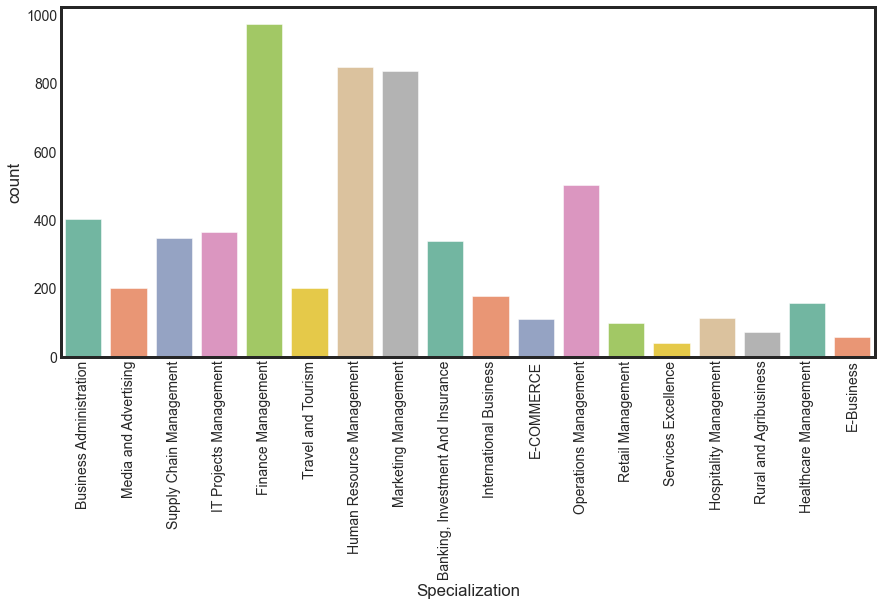

In [33]:
Countplot(lead_score,'Specialization')

It may be possible that the lead has no specialization or may be a student and has no work experience yet , thus he/she has not entered any value. We will create a new category called 'Others' to replace the null values.

In [34]:
lead_score['Specialization']=lead_score['Specialization'].replace(np.nan,'Others')

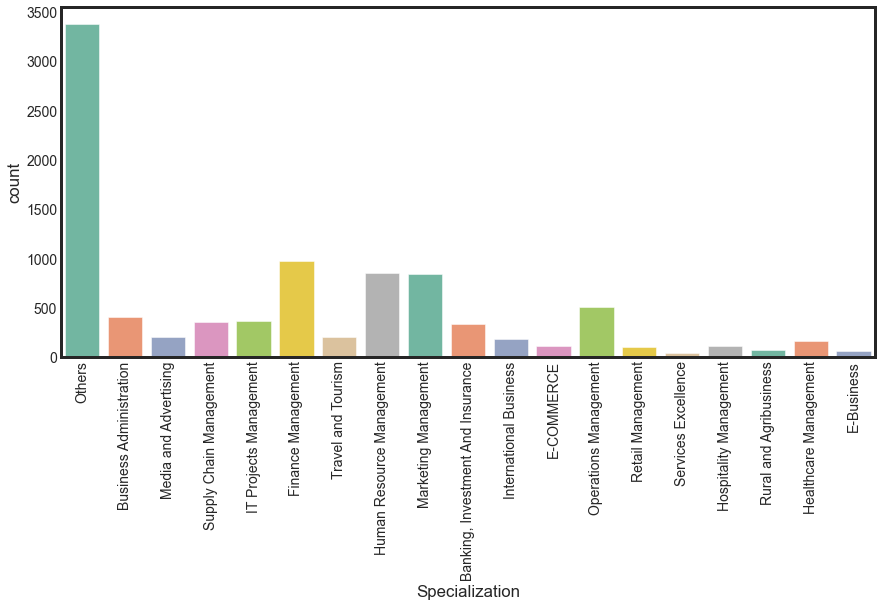

In [35]:
Countplot(lead_score,'Specialization')

In [36]:
lead_score['Specialization'].isna().sum()

0

## 3) `What matters most to you in choosing a course Column `

In [37]:
lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

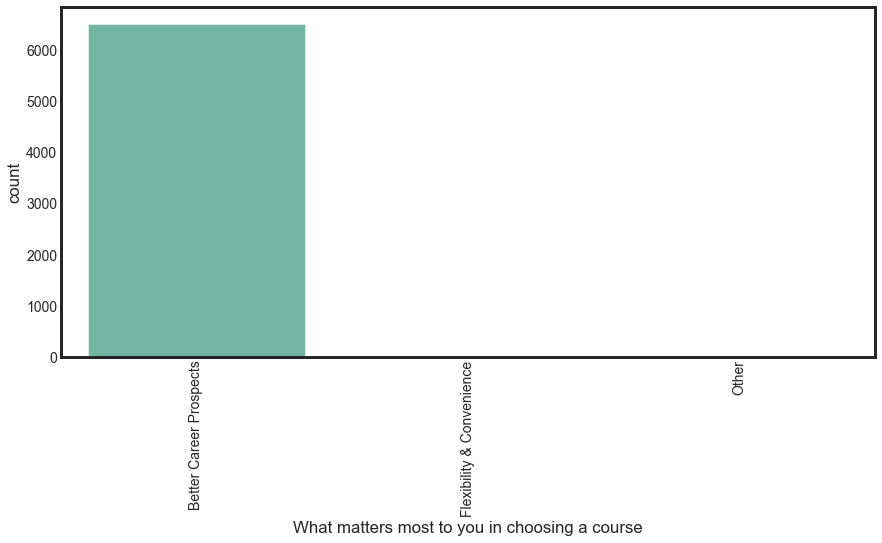

In [38]:
Countplot(lead_score,'What matters most to you in choosing a course')

In [39]:
lead_score['What matters most to you in choosing a course'].isna().sum()

2709

As the data is skewed, we can delete the column. It doses add any information to the model.

In [40]:
lead_score.drop('What matters most to you in choosing a course',1,inplace=True)
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No


In [41]:
categorical_missing(lead_score,lead_score.select_dtypes(exclude=['number']).columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
7,What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.11
5,Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.63
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.11
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.39
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.00
2,Do Not Email,"[No, Yes]",2,0,0.00
3,Do Not Call,"[No, Yes]",2,0,0.00
6,Specialization,"[Others, Business Administration, Media and Ad...",19,0,0.00
8,Search,"[No, Yes]",2,0,0.00
9,Newspaper Article,"[No, Yes]",2,0,0.00


## 4) `What is your current occupation Column`

In [42]:
lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [43]:
(lead_score['What is your current occupation'].value_counts(normalize=True)*100).round(1)

Unemployed              85.5
Working Professional    10.8
Student                  3.2
Other                    0.2
Housewife                0.2
Businessman              0.1
Name: What is your current occupation, dtype: float64

<AxesSubplot:ylabel='What is your current occupation'>

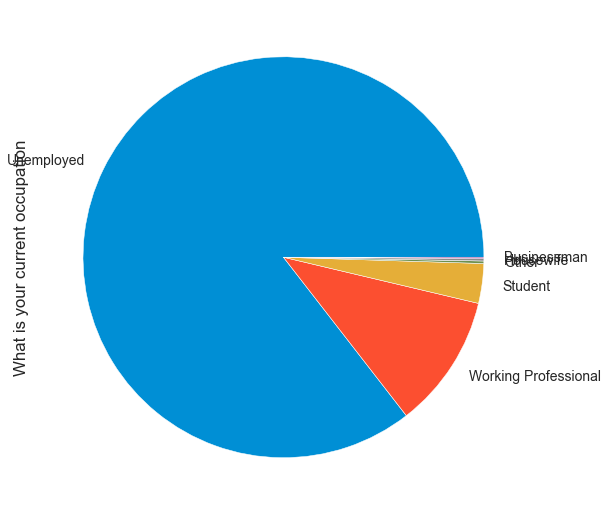

In [44]:
(lead_score['What is your current occupation'].value_counts(normalize=True)*100).round(1).plot.pie(y='What is your current occupation', figsize=(8, 10))

85.5% values are "Unemployed". If we impute the data as "Unemployed" then data will become more skewed. 

In [45]:
lead_score['What is your current occupation']=lead_score['What is your current occupation'].replace(np.nan,'Unknown')
(lead_score['What is your current occupation'].value_counts(normalize=True)*100).round(1)

Unemployed              60.6
Unknown                 29.1
Working Professional     7.6
Student                  2.3
Other                    0.2
Housewife                0.1
Businessman              0.1
Name: What is your current occupation, dtype: float64

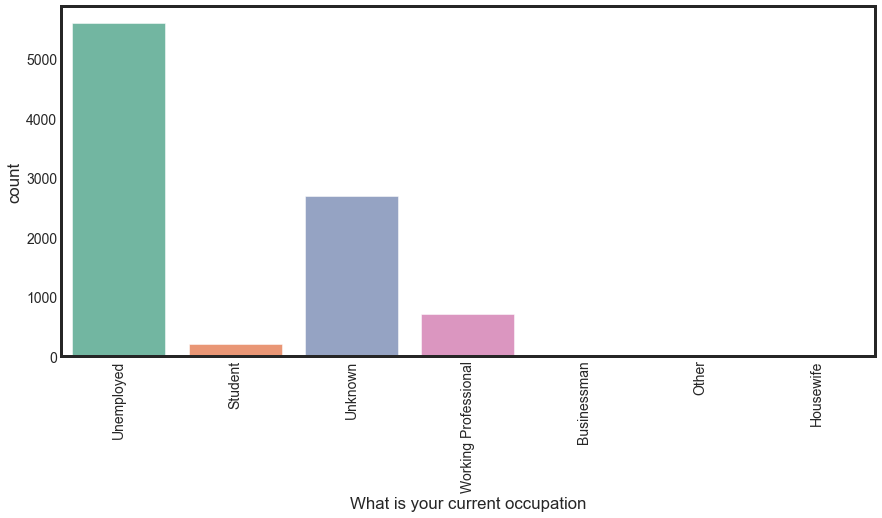

In [46]:
Countplot(lead_score,'What is your current occupation')

In [47]:
lead_score['What is your current occupation'].isna().sum()

0

## 5) `Country Column`

In [48]:
categorical_missing(lead_score,lead_score.select_dtypes(exclude='number').columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
5,Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.63
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.11
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.39
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.00
2,Do Not Email,"[No, Yes]",2,0,0.00
3,Do Not Call,"[No, Yes]",2,0,0.00
6,Specialization,"[Others, Business Administration, Media and Ad...",19,0,0.00
7,What is your current occupation,"[Unemployed, Student, Unknown, Working Profess...",7,0,0.00
8,Search,"[No, Yes]",2,0,0.00
9,Newspaper Article,"[No, Yes]",2,0,0.00


In [49]:
lead_score['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Uganda                     2
Asia/Pacific Region        2
Philippines                2
Belgium                    2
China                      2
Bangladesh                 2
Ghana                      2
Italy                      2
Netherlands                2
Malaysia                   1
Sri Lanka                  1
Vietnam                    1
Indonesia                  1
Liberia                    1
Denmark                    1
Kenya         

In [50]:
(lead_score['Country'].value_counts(normalize=True)*100).round(1)

India                   95.8
United States            1.0
United Arab Emirates     0.8
Singapore                0.4
Saudi Arabia             0.3
United Kingdom           0.2
Australia                0.2
Qatar                    0.1
Hong Kong                0.1
Bahrain                  0.1
France                   0.1
Oman                     0.1
unknown                  0.1
Kuwait                   0.1
South Africa             0.1
Canada                   0.1
Germany                  0.1
Nigeria                  0.1
Sweden                   0.0
Uganda                   0.0
Asia/Pacific Region      0.0
Philippines              0.0
Belgium                  0.0
China                    0.0
Bangladesh               0.0
Ghana                    0.0
Italy                    0.0
Netherlands              0.0
Malaysia                 0.0
Sri Lanka                0.0
Vietnam                  0.0
Indonesia                0.0
Liberia                  0.0
Denmark                  0.0
Kenya         

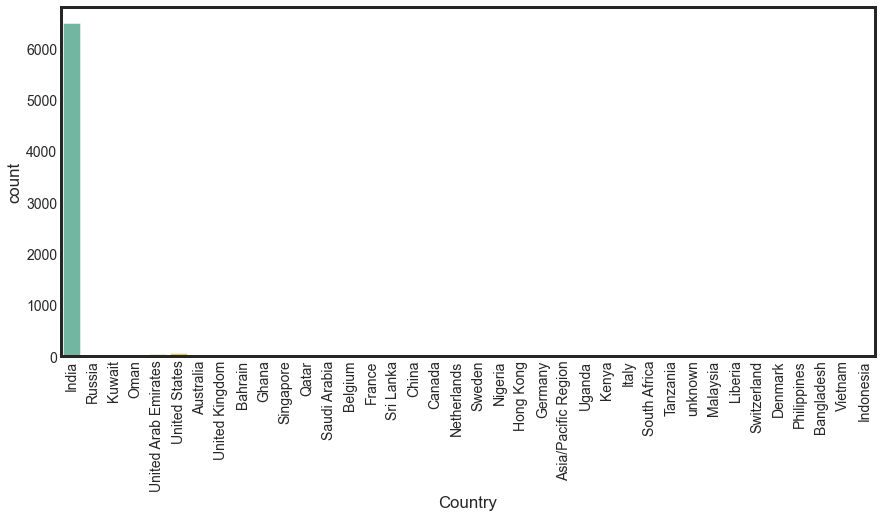

In [51]:
Countplot(lead_score,'Country')

In [52]:
lead_score['Country'].isna().sum()

2461

Country data is heavily skewed as 95% of the data is mapped as India. Similar to City, Country data is not required for Model building as X-Education is online platform. We will drop the country columns too.

In [53]:
lead_score.drop('Country',1,inplace=True)
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No


In [54]:
categorical_missing(lead_score,lead_score.select_dtypes(exclude='number').columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.11
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.39
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.00
2,Do Not Email,"[No, Yes]",2,0,0.00
3,Do Not Call,"[No, Yes]",2,0,0.00
5,Specialization,"[Others, Business Administration, Media and Ad...",19,0,0.00
6,What is your current occupation,"[Unemployed, Student, Unknown, Working Profess...",7,0,0.00
7,Search,"[No, Yes]",2,0,0.00
8,Newspaper Article,"[No, Yes]",2,0,0.00
9,X Education Forums,"[No, Yes]",2,0,0.00


## 6) ` Last Activity Column`

In [55]:
lead_score['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [56]:
(lead_score['Last Activity'].value_counts(normalize=True)*100).round(1)

Email Opened                    37.6
SMS Sent                        30.0
Olark Chat Conversation         10.6
Page Visited on Website          7.0
Converted to Lead                4.7
Email Bounced                    3.6
Email Link Clicked               2.9
Form Submitted on Website        1.3
Unreachable                      1.0
Unsubscribed                     0.7
Had a Phone Conversation         0.3
Approached upfront               0.1
View in browser link Clicked     0.1
Email Marked Spam                0.0
Email Received                   0.0
Visited Booth in Tradeshow       0.0
Resubscribed to emails           0.0
Name: Last Activity, dtype: float64

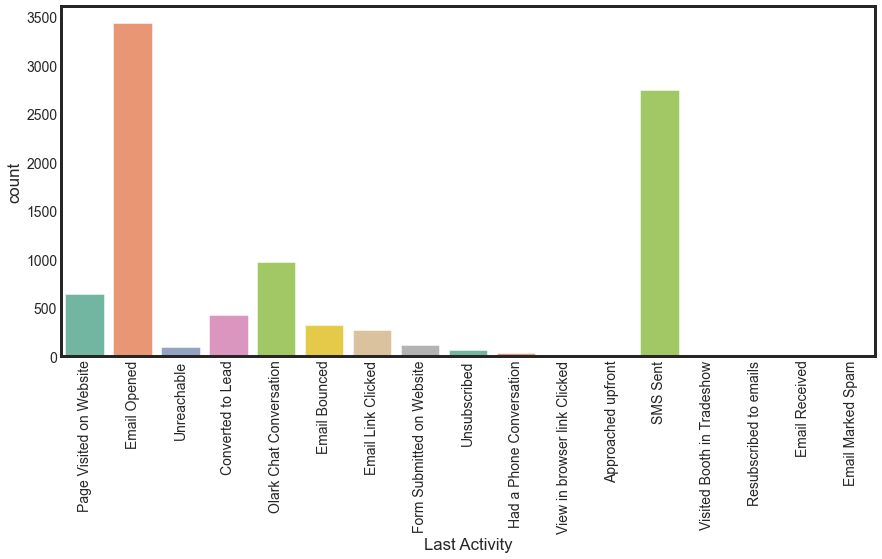

In [57]:
Countplot(lead_score,'Last Activity')

As we are unsure what could be the Last activity, we will replace it with the most frequent activity "Email Opened".and missing value are very less so we impute with most frequeny value.

In [58]:
lead_score['Last Activity']=lead_score['Last Activity'].replace(np.nan,'Email Opened')

In [59]:
lead_score['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [60]:
lead_score['Last Activity'].isna().sum()

0

In [61]:
categorical_missing(lead_score,lead_score.select_dtypes(exclude='number').columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.39
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.00
2,Do Not Email,"[No, Yes]",2,0,0.00
3,Do Not Call,"[No, Yes]",2,0,0.00
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,0,0.00
5,Specialization,"[Others, Business Administration, Media and Ad...",19,0,0.00
6,What is your current occupation,"[Unemployed, Student, Unknown, Working Profess...",7,0,0.00
7,Search,"[No, Yes]",2,0,0.00
8,Newspaper Article,"[No, Yes]",2,0,0.00
9,X Education Forums,"[No, Yes]",2,0,0.00


## 7) `Lead Source Column`

In [62]:
lead_score['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
blog                    1
NC_EDM                  1
youtubechannel          1
testone                 1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [63]:
(lead_score['Lead Source'].value_counts(normalize=True)*100).round(1)

Google               31.2
Direct Traffic       27.6
Olark Chat           19.1
Organic Search       12.5
Reference             5.8
Welingak Website      1.5
Referral Sites        1.4
Facebook              0.6
bing                  0.1
google                0.1
Click2call            0.0
Press_Release         0.0
Live Chat             0.0
Social Media          0.0
welearnblog_Home      0.0
blog                  0.0
NC_EDM                0.0
youtubechannel        0.0
testone               0.0
WeLearn               0.0
Pay per Click Ads     0.0
Name: Lead Source, dtype: float64

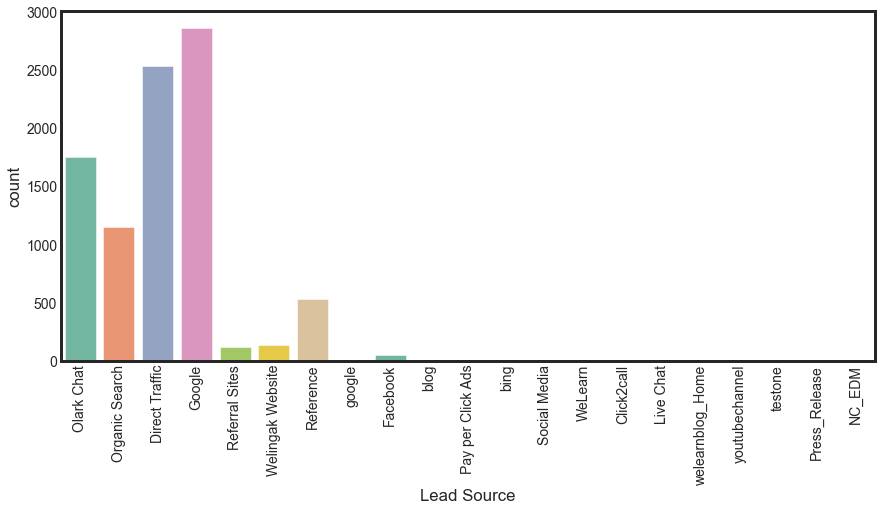

In [64]:
Countplot(lead_score,'Lead Source')

As Google seems to be most used Lead Source, we will replace null values with Google. There is a category 'google' which is same as 'Google' We will replace the values

In [65]:
lead_score['Lead Source']=lead_score['Lead Source'].replace(['google',np.nan],'Google')

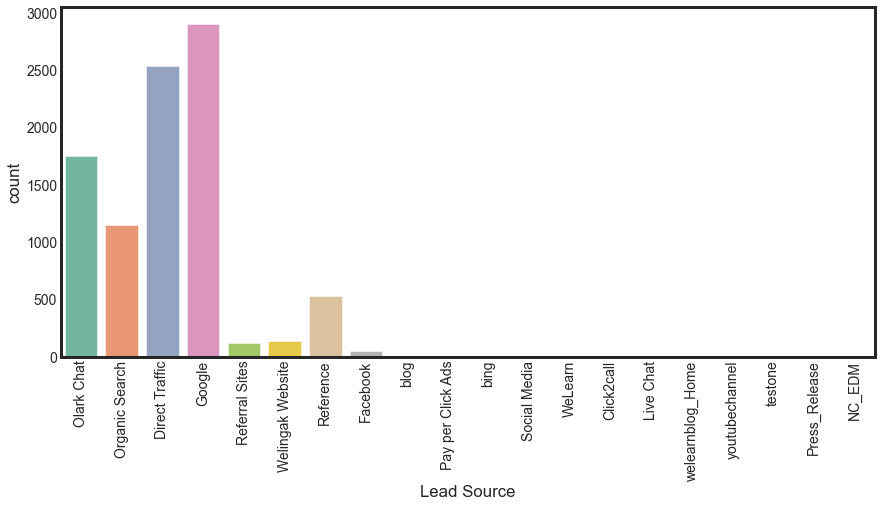

In [66]:
Countplot(lead_score,'Lead Source')

In [67]:
lead_score['Lead Source'].isna().sum()

0

In [68]:
categorical_missing(lead_score,lead_score.select_dtypes(exclude='number').columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",20,0,0.0
2,Do Not Email,"[No, Yes]",2,0,0.0
3,Do Not Call,"[No, Yes]",2,0,0.0
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,0,0.0
5,Specialization,"[Others, Business Administration, Media and Ad...",19,0,0.0
6,What is your current occupation,"[Unemployed, Student, Unknown, Working Profess...",7,0,0.0
7,Search,"[No, Yes]",2,0,0.0
8,Newspaper Article,"[No, Yes]",2,0,0.0
9,X Education Forums,"[No, Yes]",2,0,0.0


## `We have successfully imputed all Categorical Columns. Now let's look into numerical columns.`

# 4.4 `Numerical Columns Null Value Treatment`

In [69]:
categorical_missing(lead_score,lead_score.select_dtypes(include='number').columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
1,TotalVisits,"[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0,...",41,137,1.48
3,Page Views Per Visit,"[0.0, 2.5, 2.0, 1.0, 4.0, 8.0, 2.67, 11.0, 5.0...",114,137,1.48
0,Converted,"[0, 1]",2,0,0.00
2,Total Time Spent on Website,"[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351, ...",1731,0,0.00


## 1) `TotalVisits Column`

In [70]:
lead_score['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [71]:
lead_score['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

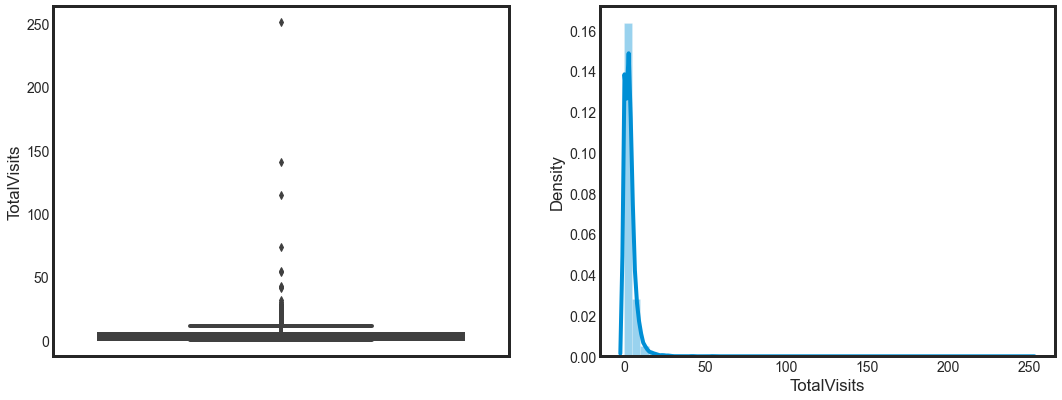

In [72]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(y=lead_score['TotalVisits'])
plt.subplot(1,2,2)
sns.distplot(lead_score['TotalVisits'])
plt.show()

As we see there are some outliers in the data and and distribution right skwed we will impute with median and not mean value.

In [73]:
lead_score['TotalVisits'].fillna(lead_score['TotalVisits'].median(),inplace=True)


In [74]:
lead_score['TotalVisits'].isna().sum()

0

# 2) `Page Views Per Visit` Column	

In [75]:
lead_score['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [76]:
lead_score['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

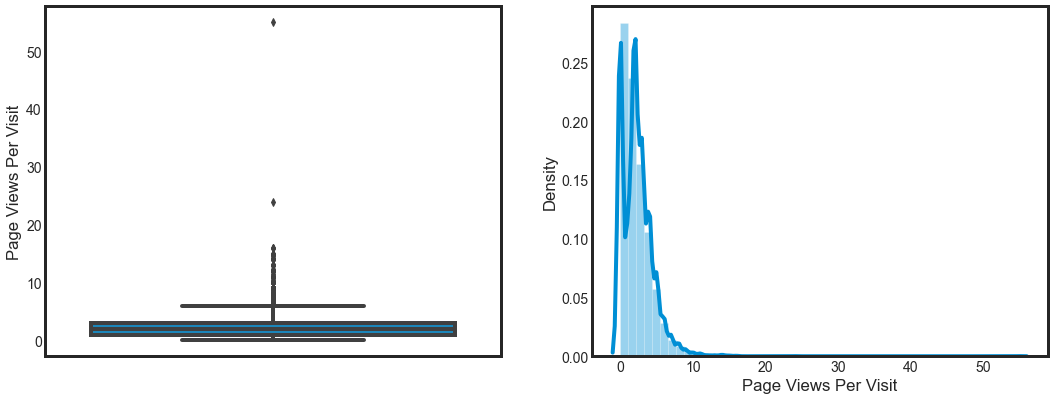

In [77]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(y=lead_score['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.distplot(lead_score['Page Views Per Visit'])
plt.show()

As we see there are some outliers in the data and distribution right skwed , we will impute with median and not mean value.

In [78]:
lead_score['Page Views Per Visit']=lead_score['Page Views Per Visit'].fillna(lead_score['Page Views Per Visit'].median())

In [79]:
lead_score['Page Views Per Visit'].isna().sum()

0

# 5.0  Exploratoray Data Analysis

## 5.1 `Data Imbalance`

In [80]:
lead_score['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [81]:
(lead_score['Converted'].value_counts(normalize=True)*100).round(1)

0    61.5
1    38.5
Name: Converted, dtype: float64

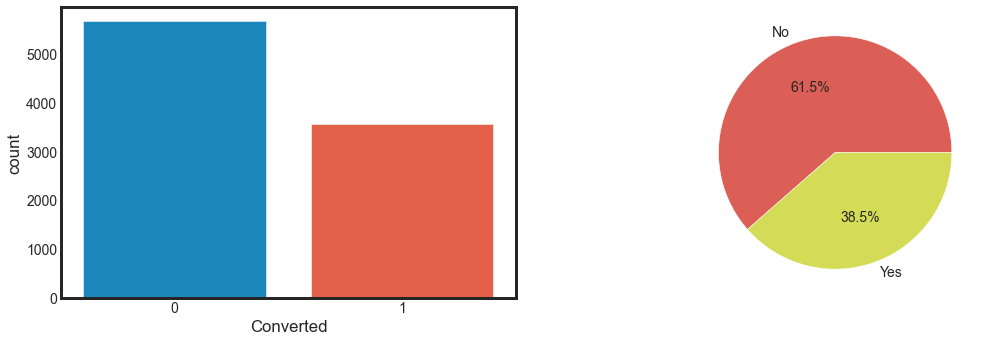

In [82]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(data=lead_score,x='Converted')
plt.subplot(1,2,2)
data = lead_score['Converted'].value_counts()
labels = ['No','Yes']
#Read in Seaborn color palette
colors = sns.color_palette('hls')[0:2]
#Create pie chart with Matplotlib
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%')
plt.show()

In [83]:
# Renaming some of the column headers which has long header

lead_score.rename(columns={'What is your current occupation': 'Occupation', 
                     'Through Recommendations': 'Recommendation',
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
lead_score.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

In the lead conversion ration, 38.5% has converted to leads where as 61.5% did not convert to a lead. So it seems like a balanced dataset.

# 5.2) `Graph Function`

Most of the features in the dataset are categorical. Let us begin our analysis by performing segmented univariate analysis on each categorical feature. We will view bar plots that will show the total count of converted and non-converted leads in every category.

In [84]:
def univariate_cat(data,col):
    lead_score=data
    col=col
    s=pd.concat([lead_score[col].value_counts(),(lead_score[col].value_counts(normalize=True)*100).round(1)],axis=1,keys=['count','percentage'])
    graph(data,col)
    return s


In [85]:
def graph(data,col):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.countplot(data[col],hue=data['Converted'])
    plt.xticks(rotation=90)
    plt.title(col)
    plt.subplot(1,2,2)
    v=lead_score[[col,'Converted']].groupby([col]).mean()*100
    v=v.sort_values('Converted',ascending=True)
    sns.barplot(data=v,y='Converted',x=v.index)
    plt.xticks(rotation=90)
    plt.ylabel(' percent of converted leads')
    plt.title(col+' '+'( Converted % )')
    
    plt.show()

 ## 5.3 `Univariate Analysis - Categorical`

### `Lead Origin`

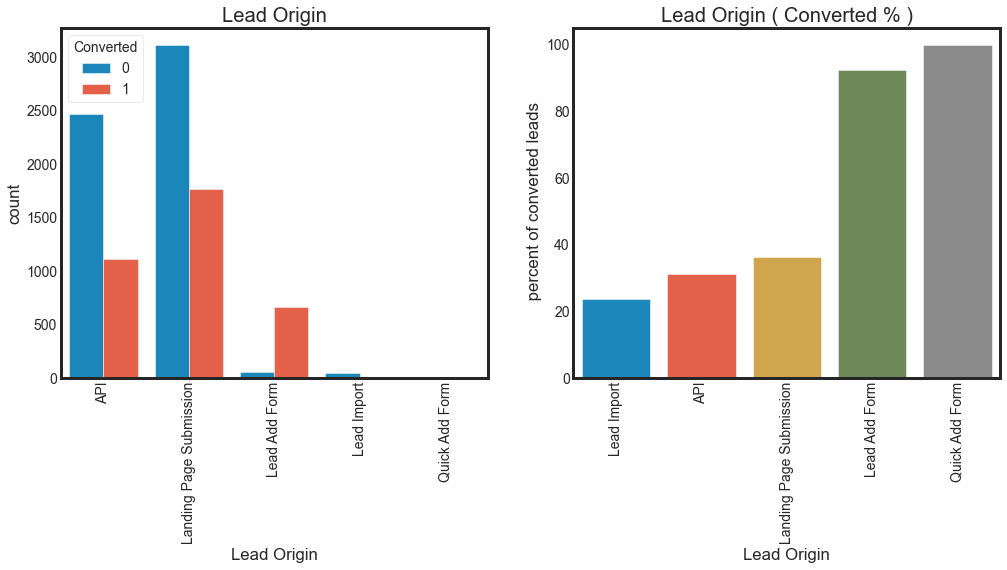

,count,percentage
Landing Page Submission,4886,52.9
API,3580,38.7
Lead Add Form,718,7.8
Lead Import,55,0.6
Quick Add Form,1,0.0


In [86]:
univariate_cat(lead_score,'Lead Origin')

## `Insight:`
- Most Leads originated from submissions on the landing page and around 38% of those are converted followed by API, where around 30% are converted.
- Even though Lead Origins from Quick Add Form are 100% Converted, there was just 1 lead from that category. Leads from the Lead Add Form are the next highest conversions in this category at around 90% of 718 leads.
- Lead Import are very less in count and conversion rate is also the lowest
- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

## `Lead Source`

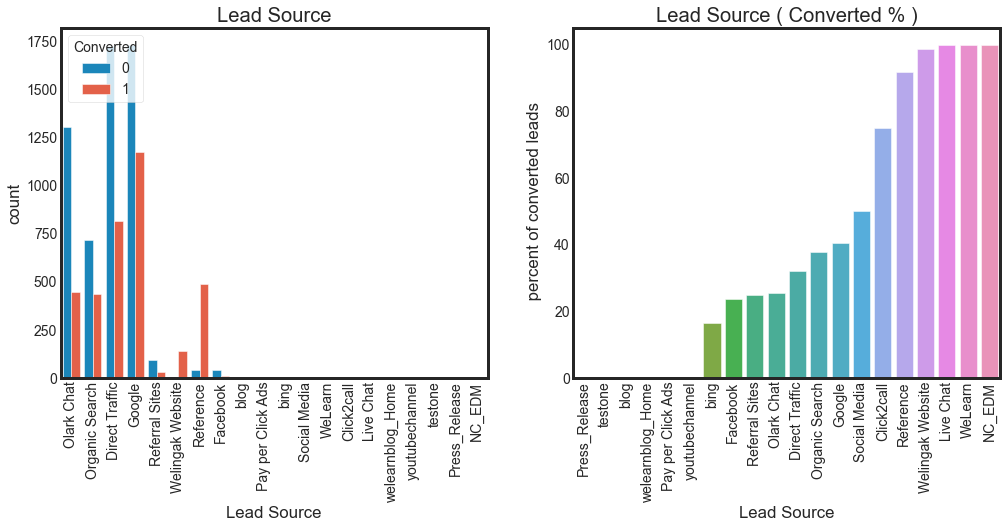

,count,percentage
Google,2909,31.5
Direct Traffic,2543,27.5
Olark Chat,1755,19.0
Organic Search,1154,12.5
Reference,534,5.8
Welingak Website,142,1.5
Referral Sites,125,1.4
Facebook,55,0.6
bing,6,0.1
Click2call,4,0.0


In [87]:
univariate_cat(lead_score,'Lead Source')

`We will combine smaller lead sources as 'Other Sources'`

In [88]:
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

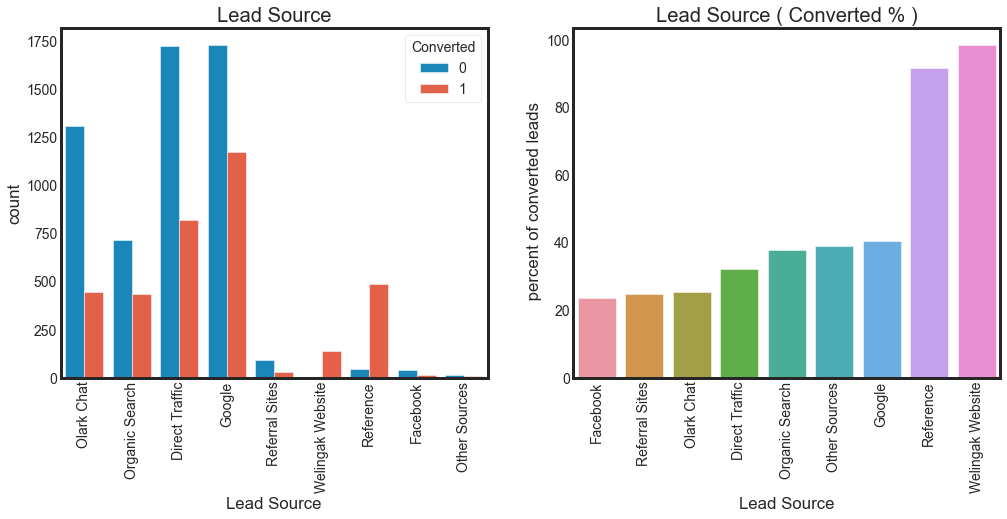

,count,percentage
Google,2909,31.5
Direct Traffic,2543,27.5
Olark Chat,1755,19.0
Organic Search,1154,12.5
Reference,534,5.8
Welingak Website,142,1.5
Referral Sites,125,1.4
Facebook,55,0.6
Other Sources,23,0.2


In [89]:
univariate_cat(lead_score,'Lead Source')

## `Insight:`

- The source of most leads was Google, and 40% of the leads converted, followed by Direct Traffic,Organic search and Olark chat where around 35%, 38% and 30% converted respectively.
- A lead that came from a reference has over 90% conversion from the total of 534.
- Welingak Website has almost 100% lead conversion rate. This option should be explored more to increase lead conversion


`To increase lead count, initiatives should be taken so already exitsing members increase their referrals`

## `Do Not Email`

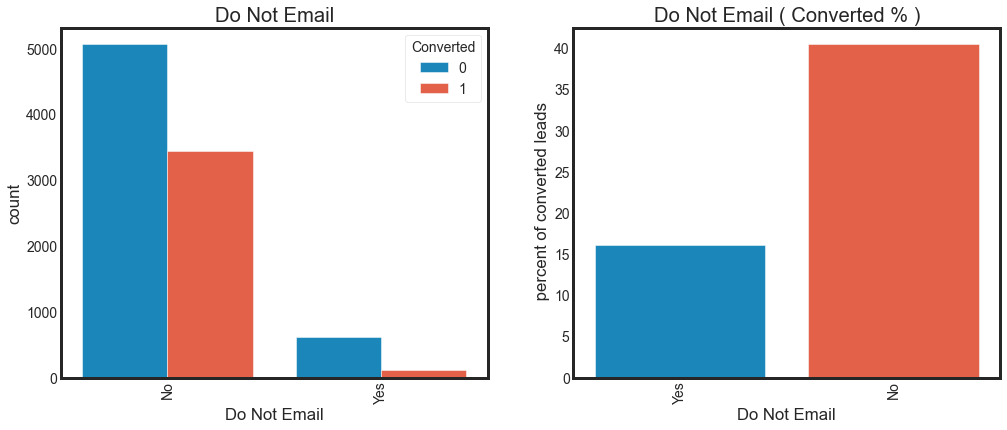

,count,percentage
No,8506,92.1
Yes,734,7.9


In [90]:
univariate_cat(lead_score,'Do Not Email')

## `Insight:`

- Majority of the people are ok with receiving email (~92%)
- People who are ok with email has conversion rate of 40%
- People who have opted out of receive email has lower rate of conversion (only 15%)

## `Last Activity`

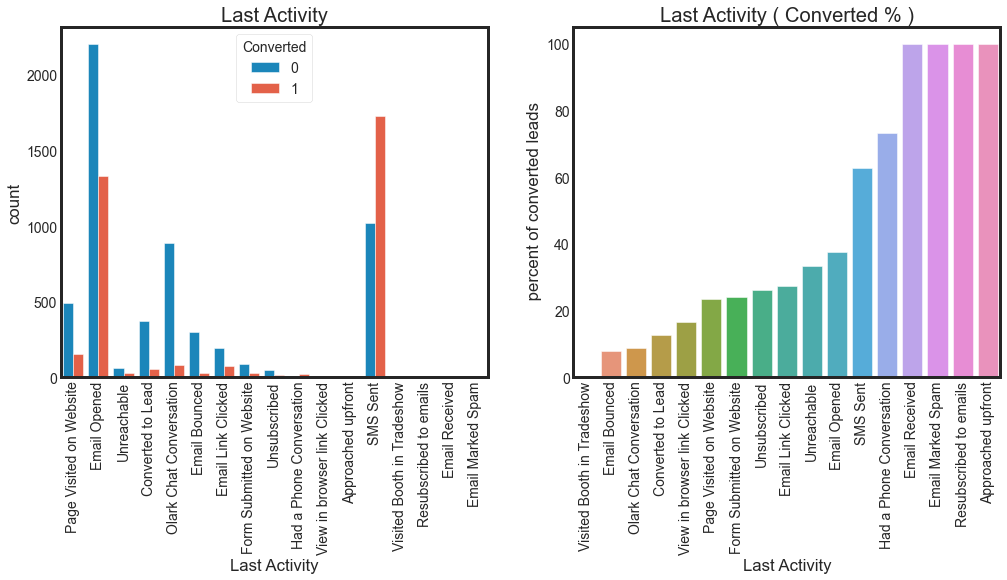

,count,percentage
Email Opened,3540,38.3
SMS Sent,2745,29.7
Olark Chat Conversation,973,10.5
Page Visited on Website,640,6.9
Converted to Lead,428,4.6
Email Bounced,326,3.5
Email Link Clicked,267,2.9
Form Submitted on Website,116,1.3
Unreachable,93,1.0
Unsubscribed,61,0.7


In [91]:
univariate_cat(lead_score,'Last Activity')

`We will combine smaller Last Activity values as 'Other Activity'`.

In [92]:
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

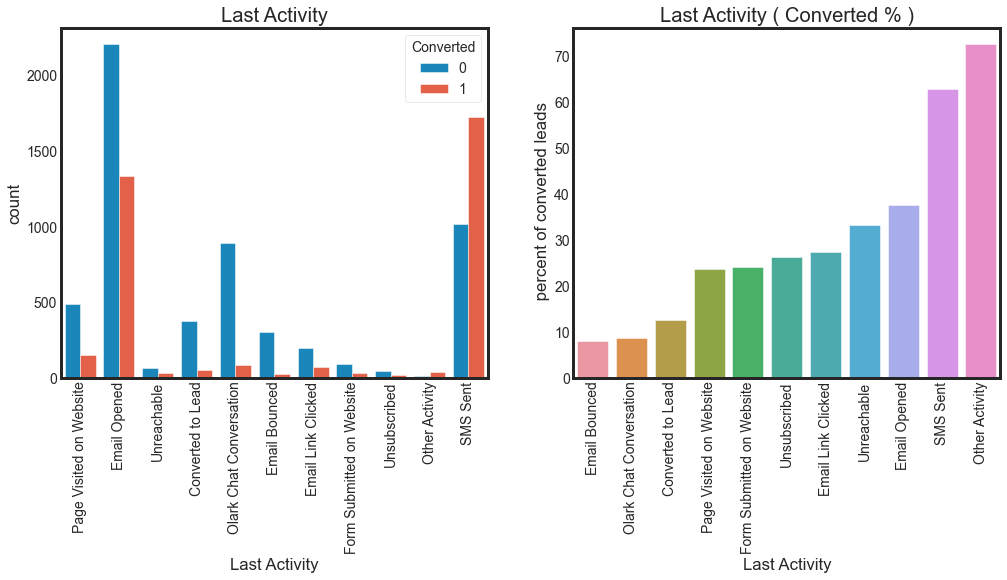

,count,percentage
Email Opened,3540,38.3
SMS Sent,2745,29.7
Olark Chat Conversation,973,10.5
Page Visited on Website,640,6.9
Converted to Lead,428,4.6
Email Bounced,326,3.5
Email Link Clicked,267,2.9
Form Submitted on Website,116,1.3
Unreachable,93,1.0
Unsubscribed,61,0.7


In [93]:
univariate_cat(lead_score,'Last Activity')

## `Insight`:
- Most of the lead have their Email opened as their last activity
- Conversion rate for leads with last activity as SMS Sent is almost 60%

## `Specialization`

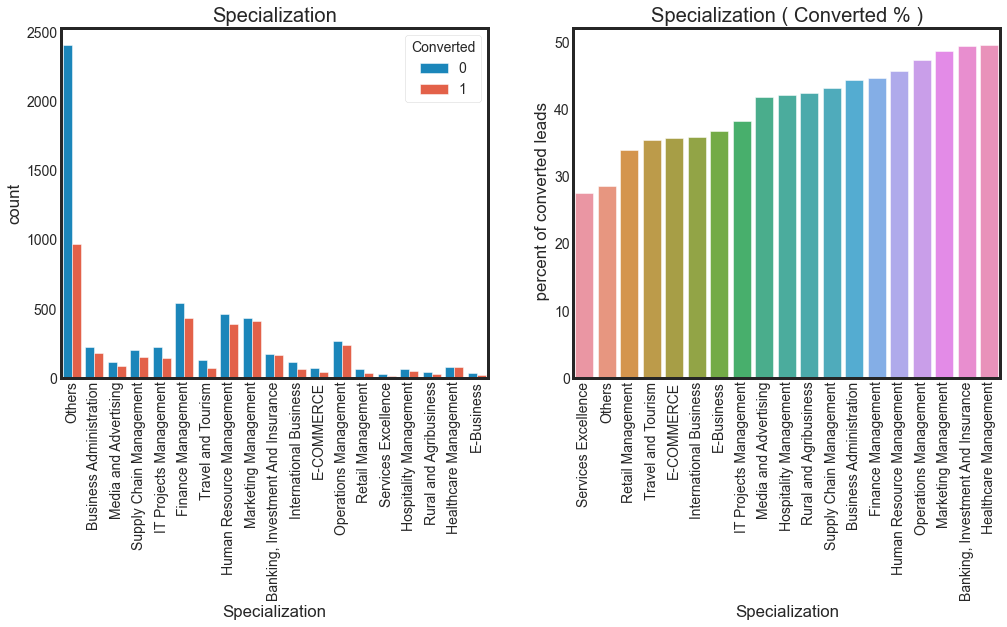

,count,percentage
Others,3380,36.6
Finance Management,976,10.6
Human Resource Management,848,9.2
Marketing Management,838,9.1
Operations Management,503,5.4
Business Administration,403,4.4
IT Projects Management,366,4.0
Supply Chain Management,349,3.8
"Banking, Investment And Insurance",338,3.7
Media and Advertising,203,2.2


In [94]:
univariate_cat(lead_score,'Specialization')

## `Insight`:
- Most of the leads have not mentioned a specialization and around 28% of those converted
- Leads with Finance management and Marketing Management - Over 45% Converted

## `Occupation`

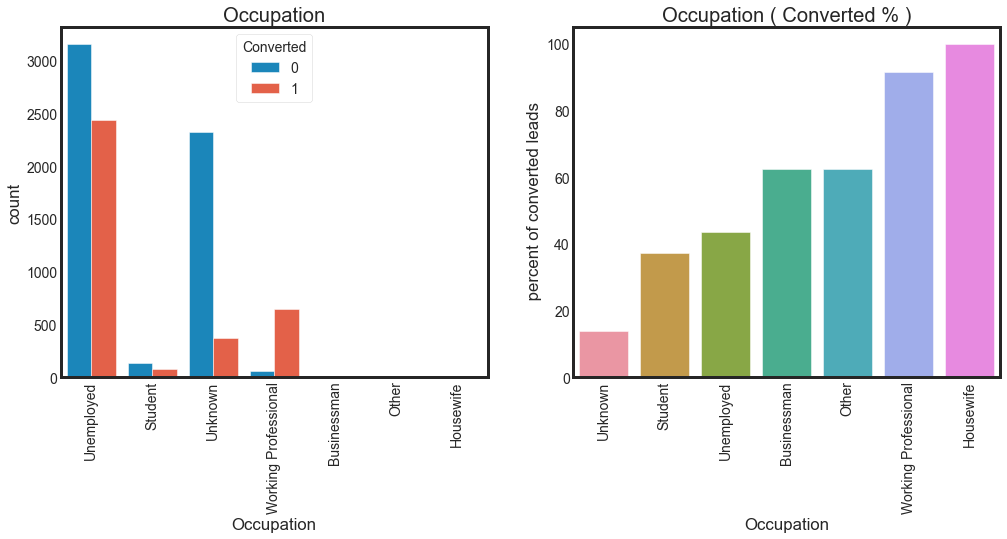

,count,percentage
Unemployed,5600,60.6
Unknown,2690,29.1
Working Professional,706,7.6
Student,210,2.3
Other,16,0.2
Housewife,10,0.1
Businessman,8,0.1


In [95]:
univariate_cat(lead_score,'Occupation')

## `Insight`:
- Though Housewives are less in numbers, they have 100% conversion rate
- Working professionals, Businessmen and Other category have high conversion rate
- Though Unemployed people have been contacted in the highest number, the conversion rate is low (~40%)

`We cannot combine smalled value categories as their conversion rate is very different. Combing them may provide wrong predictions`.

### `Search, Newspaper, Newspaper Article, Digital Advertisement, X Education Forums, Free Copy`

The following features have two categories only. We are going to evaluate the skewness of the data and decide whether to exclude them from model building.

In [96]:
two_labels=categorical_missing(lead_score,lead_score.select_dtypes(exclude='number').columns)
two_labels.head()

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",9,0,0.0
2,Do Not Email,"[No, Yes]",2,0,0.0
3,Do Not Call,"[No, Yes]",2,0,0.0
4,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",11,0,0.0


In [97]:
two_labels_col=two_labels[two_labels['No_of_labels']==2]
two_labels_col=two_labels_col[['Column_name','No_of_labels','Labels']]
two_labels_col

,Column_name,No_of_labels,Labels
2,Do Not Email,2,"[No, Yes]"
3,Do Not Call,2,"[No, Yes]"
7,Search,2,"[No, Yes]"
8,Newspaper Article,2,"[No, Yes]"
9,X Education Forums,2,"[No, Yes]"
10,Newspaper,2,"[No, Yes]"
11,Digital Advertisement,2,"[No, Yes]"
12,Recommendation,2,"[No, Yes]"
13,Free Copy,2,"[No, Yes]"


In [98]:
def cat_two(data,col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.countplot(data[col])
    plt.subplot(1,2,2)
    data = lead_score[col].value_counts()
    labels = ['No','Yes']
    #Read in Seaborn color palette
    colors = sns.color_palette('hls')[0:2]
    #Create pie chart with Matplotlib
    plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%')
    plt.title(col)
    plt.show()
    
    

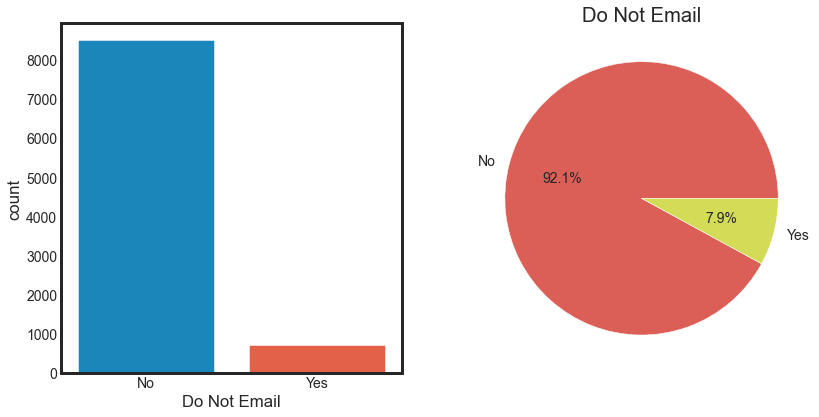

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [99]:
cat_two(lead_score,'Do Not Email')
lead_score['Do Not Email'].value_counts()

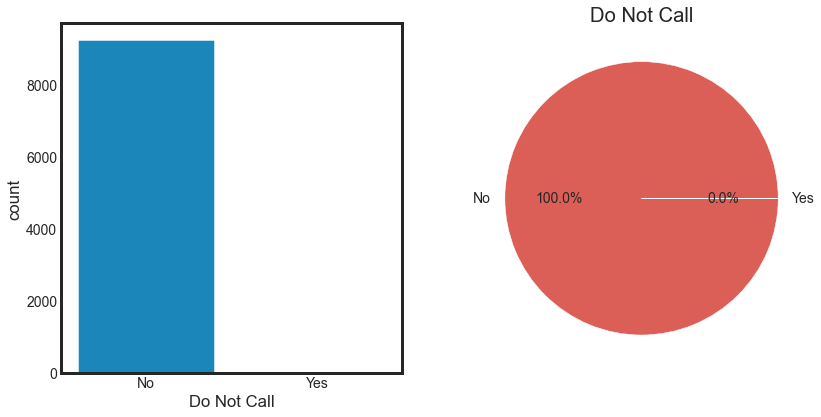

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [100]:
cat_two(lead_score,'Do Not Call')
lead_score['Do Not Call'].value_counts()

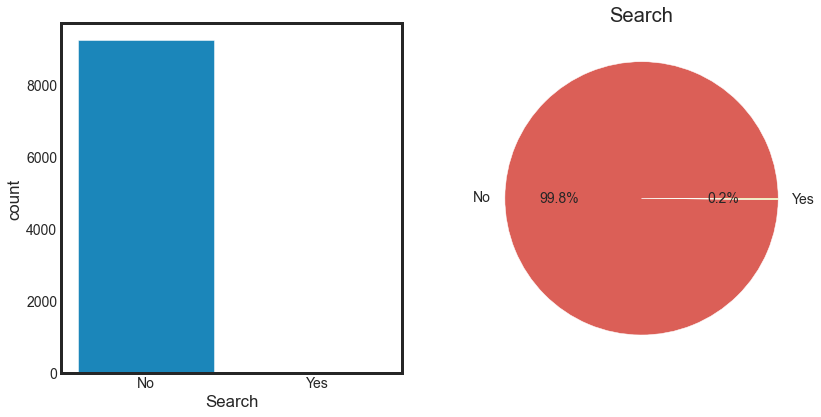

No     9226
Yes      14
Name: Search, dtype: int64

In [101]:
cat_two(lead_score,'Search')
lead_score['Search'].value_counts()

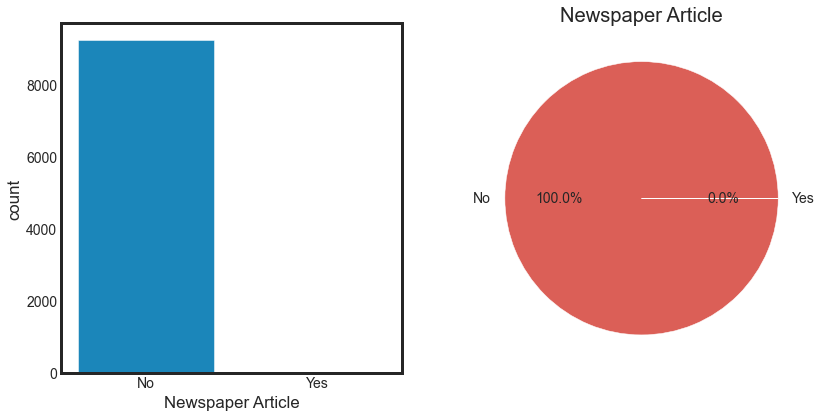

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [102]:
cat_two(lead_score,'Newspaper Article')
lead_score['Newspaper Article'].value_counts()

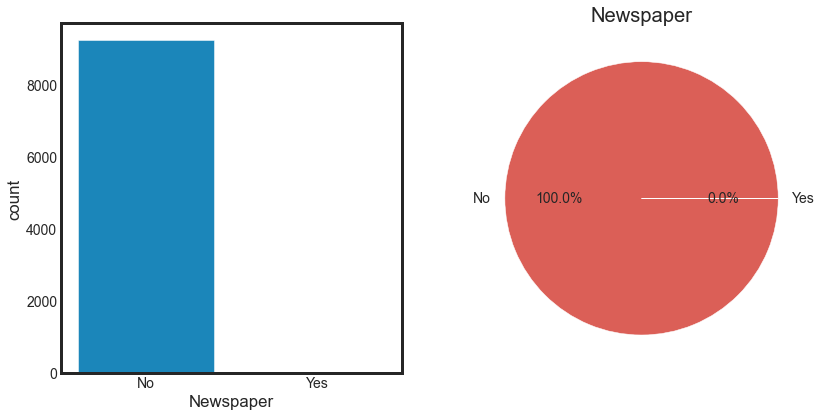

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [103]:
cat_two(lead_score,'Newspaper')
lead_score['Newspaper'].value_counts()


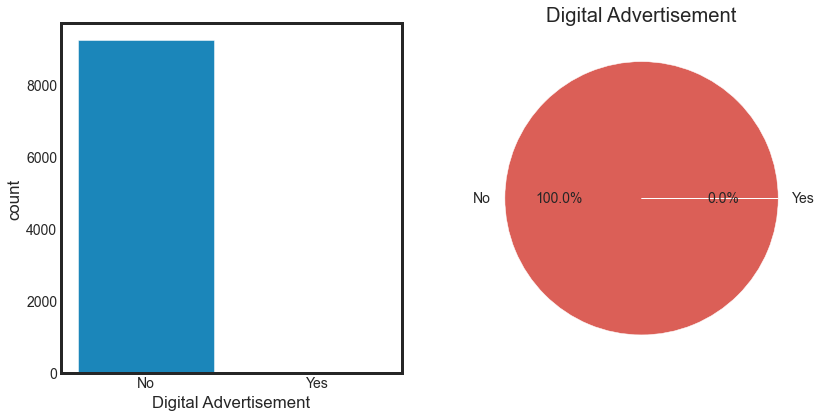

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [104]:
cat_two(lead_score,'Digital Advertisement')
lead_score['Digital Advertisement'].value_counts()

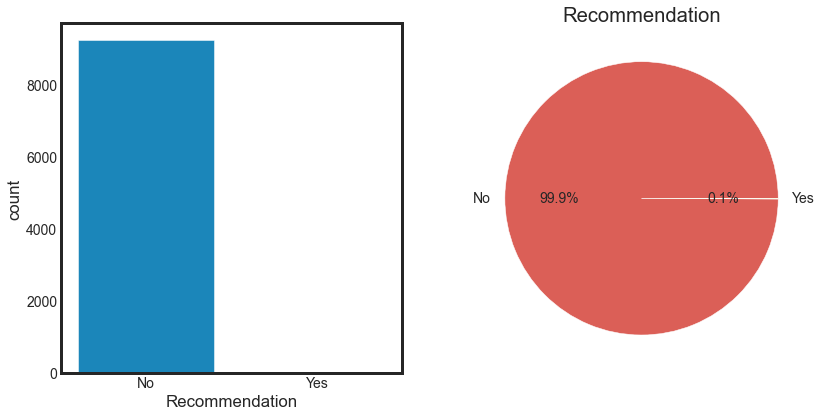

No     9233
Yes       7
Name: Recommendation, dtype: int64

In [105]:
cat_two(lead_score,'Recommendation')
lead_score['Recommendation'].value_counts()

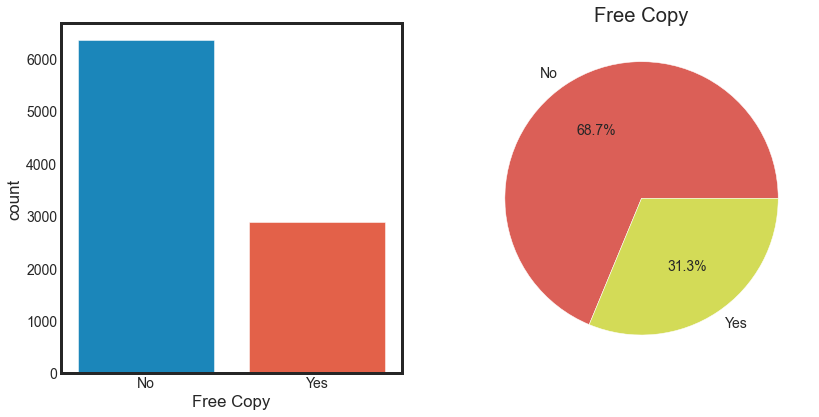

No     6352
Yes    2888
Name: Free Copy, dtype: int64

In [106]:
cat_two(lead_score,'Free Copy')
lead_score['Free Copy'].value_counts()

- `Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Recommendation` data are very skewed and can be deleted as they will not add any value to the model.


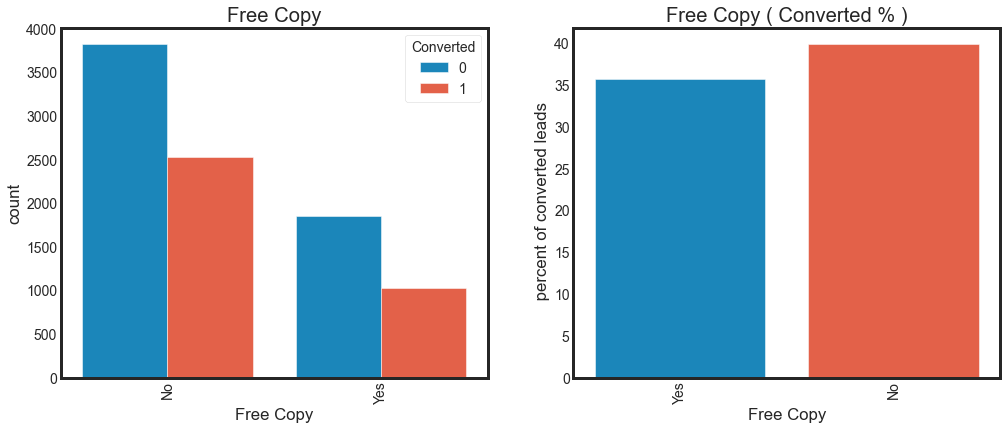

,count,percentage
No,6352,68.7
Yes,2888,31.3


In [107]:
univariate_cat(lead_score,'Free Copy')

- Distributing Free-Copy of Mastering Interview doesn't seem to add much value as the coenversion rate is almost same. We will drop all these columns.

In [108]:
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
lead_score.drop(col,axis=1,inplace=True)
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


## 5.4 `Univariate Analysis - Numerical`

In [109]:
def numerical_column(data,col):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(data[col])
    plt.subplot(1,2,2)
    sns.boxplot(data=data,x='Converted',y=col)
    plt.show()

## `TotalVisits`

In [110]:
lead_score['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [111]:
lead_score['TotalVisits'].describe([.0,.25,0.50,.75,.95,.97,.98,.99,1])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
0%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
97%        11.000000
98%        13.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

 `95% values are less than 10 in a  totalVisit`

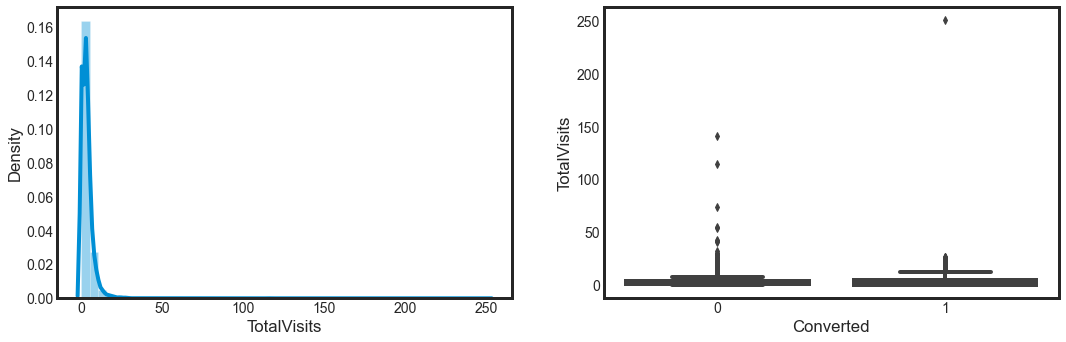

In [112]:
numerical_column(lead_score,'TotalVisits')

### `Insight`:
- TotalVisits  has some outliers which needs to be treated and the data is right skwed.

## `Total Time Spent on Website`

In [113]:
lead_score['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [114]:
lead_score['Total Time Spent on Website'].describe([.0,.25,0.50,.75,.95,.97,.98,.99,1])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
0%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
95%      1562.000000
97%      1660.000000
98%      1734.000000
99%      1840.610000
100%     2272.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

 `95% values are less than 1562 in a Total Time Spent on Website `

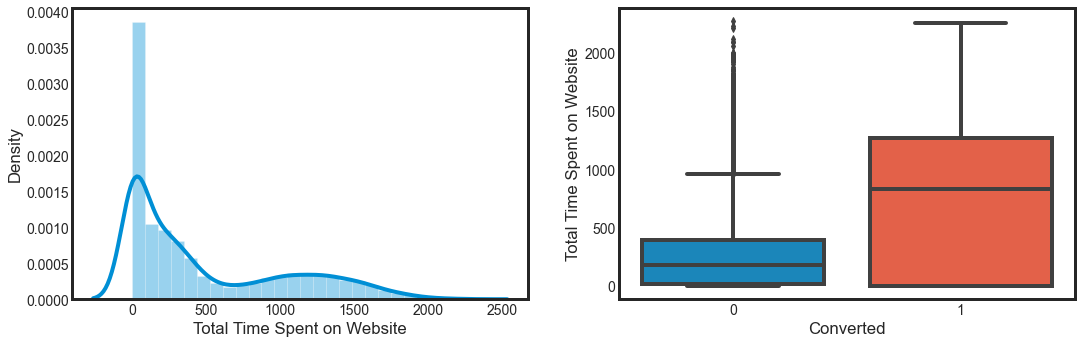

In [115]:
numerical_column(lead_score,'Total Time Spent on Website')

 ## `Insight:`
 - The people who spend more time on website has more probalbity to converted in leads

## `Page Views Per Visit`

In [116]:
lead_score['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [117]:
lead_score['Page Views Per Visit'].describe([.0,.25,0.50,.75,.95,.97,.98,.99,1])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
0%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
97%         7.000000
98%         8.000000
99%         9.000000
100%       55.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

 `99% values are less than 9 in Page Views Per Visit `

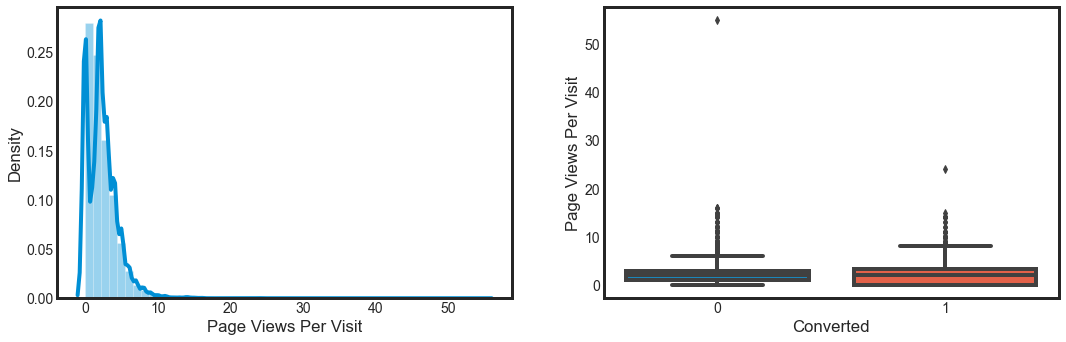

In [118]:
numerical_column(lead_score,'Page Views Per Visit')

## `Insight:`
 - Page Views per Visit has some outliers which needs to be treated.

## 5.5 `Bivariate Analysis`

<Figure size 1440x1440 with 0 Axes>

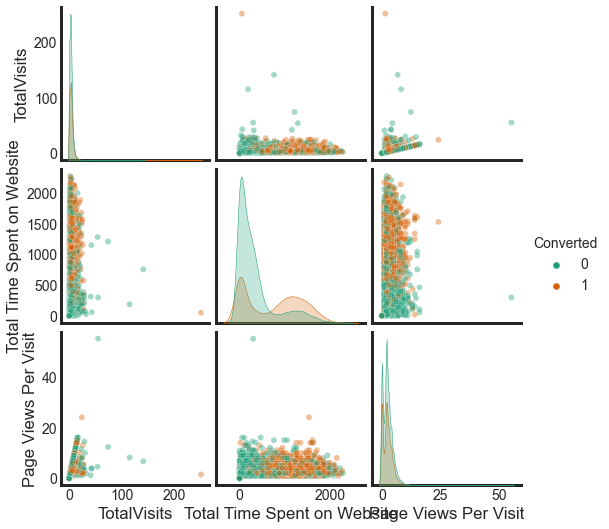

In [119]:
plt.figure(figsize =(20,20))
sns.pairplot(lead_score[numerical_columns],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

## `Insight:`
- Data is not normally distributed.

# 6.0) `Data Preparation`

## 6.1 `Outlier Treatment`

In [120]:
lead_score.describe([.1,.25,.50,.75,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


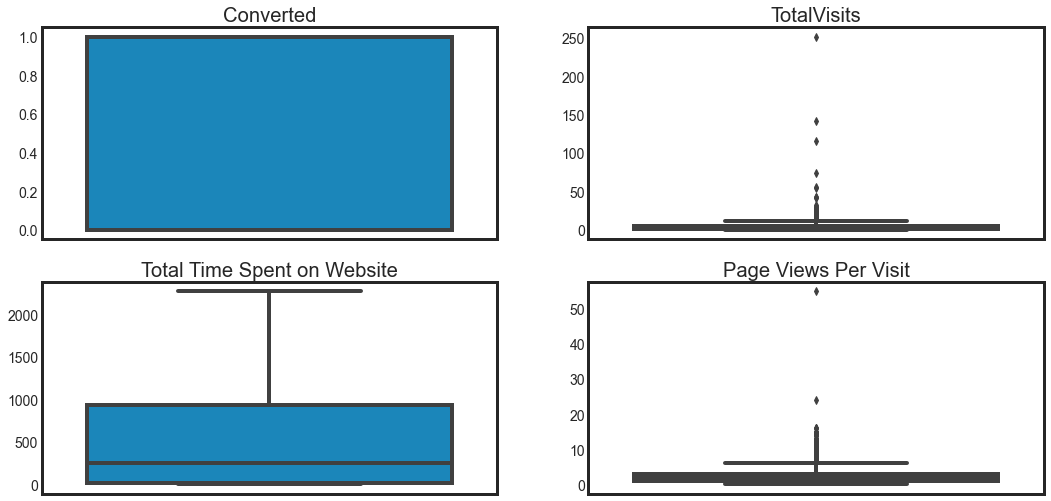

In [121]:
i=1
plt.figure(figsize=[16,8])
for col in numerical_columns:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead_score[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

### `Insight:`

Though outliers in TotalVisits and Page Views Per Visit shows valid values, this will misclassify the outcomes and consequently create problems when making inferences with the wrong model. Logistic Regression is heavily influenced by outliers. So lets cap the TotalVisits and Page Views Per Visit to their 95 th percentile due to following reasons:
- Data set is fairly high number
- 95th percentile and 99th percentile of these columns are very close and hence impact of capping to 95th or 99th percentile will be the sam

In [122]:
Q4 = lead_score['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead_score[lead_score['TotalVisits'] >= Q4]))
lead_score.loc[lead_score['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead_score['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead_score[lead_score['Page Views Per Visit'] >= Q4]))
lead_score.loc[lead_score['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping


Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


## `Insight:`
The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.

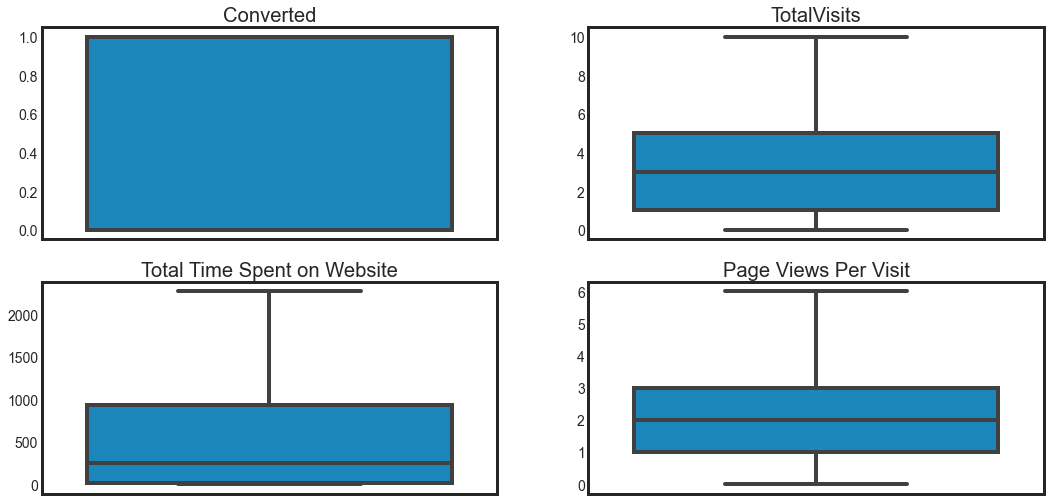

In [123]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_columns:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead_score[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [124]:
# Checking the percentile values again 
lead_score.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


## 6.2 `Convert Binary Categories`

In [125]:
binary_col=categorical_missing(lead_score,lead_score.columns)
binary_col=binary_col[binary_col['No_of_labels']==2]
binary_col[['Column_name','No_of_labels']]

,Column_name,No_of_labels
2,Do Not Email,2
3,Converted,2


In [126]:
lead_score['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [127]:
def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [128]:
lead_score['Do Not Email']=lead_score[['Do Not Email']].apply(binary_map)

In [129]:
lead_score['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

## 6.3 `Dummy Variables`

In [130]:
categorical_missing(lead_score,lead_score.columns)

,Column_name,Labels,No_of_labels,Missing_Value,Percentage_of_Missing_Value
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",9,0,0.0
2,Do Not Email,"[0, 1]",2,0,0.0
3,Converted,"[0, 1]",2,0,0.0
4,TotalVisits,"[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 10.0, 6.0, 3.0,...",11,0,0.0
5,Total Time Spent on Website,"[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351, ...",1731,0,0.0
6,Page Views Per Visit,"[0.0, 2.5, 2.0, 1.0, 4.0, 6.0, 2.67, 5.0, 3.0,...",91,0,0.0
7,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",11,0,0.0
8,Specialization,"[Others, Business Administration, Media and Ad...",19,0,0.0
9,Occupation,"[Unemployed, Student, Unknown, Working Profess...",7,0,0.0


In [131]:
Dummy_var=['Lead Origin','Lead Source','Last Activity','Specialization','Occupation']

In [132]:
lead=pd.get_dummies(data=lead_score,columns=Dummy_var,drop_first=True)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


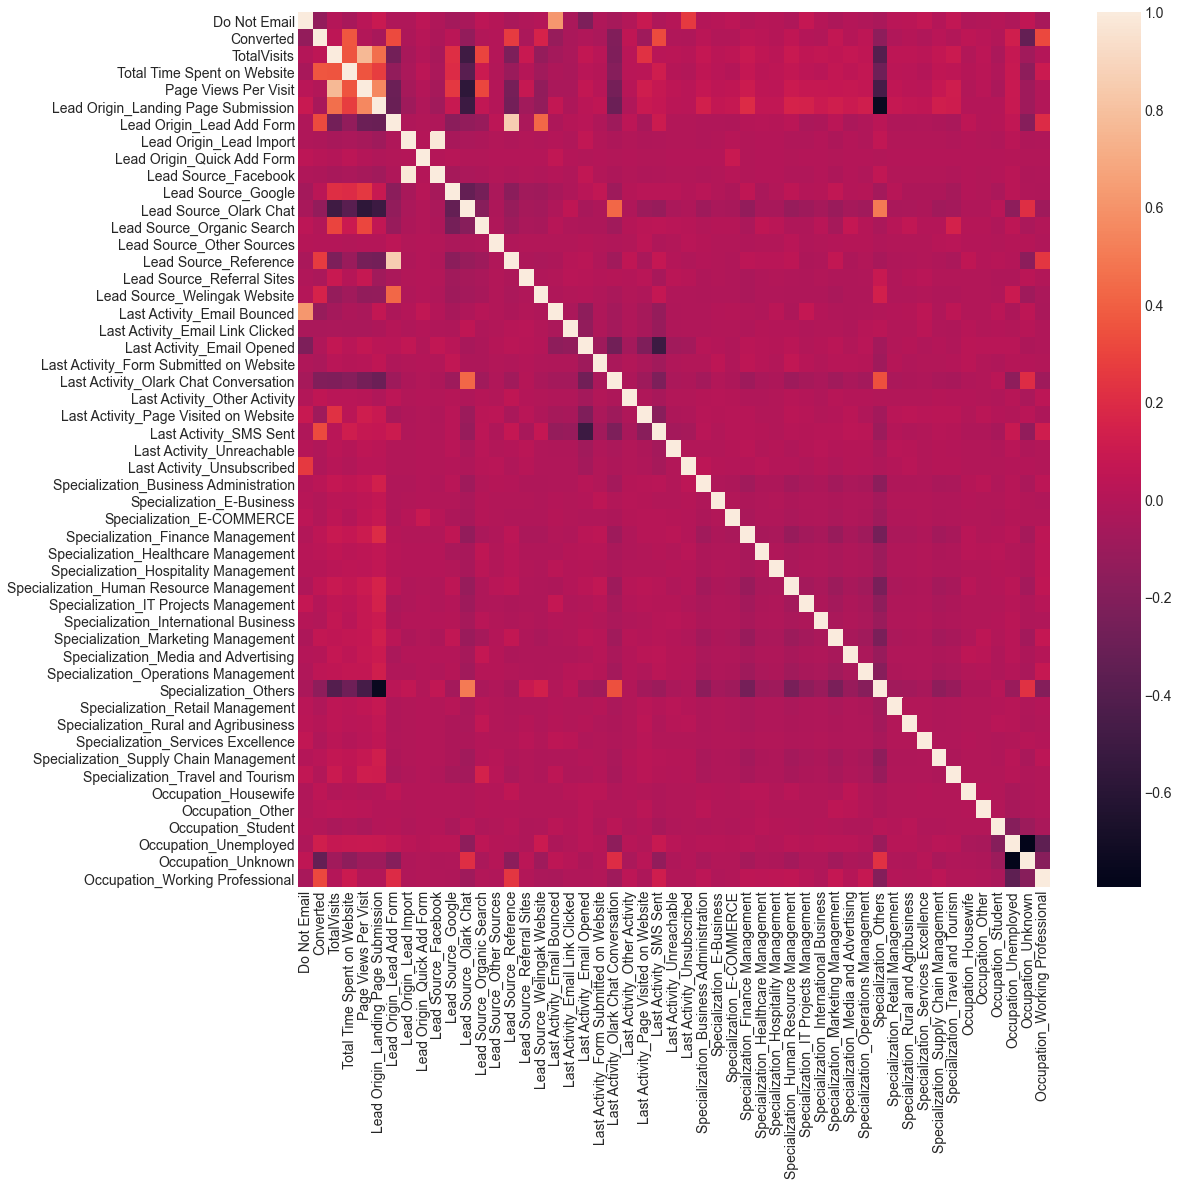

In [133]:
plt.figure(figsize=(15,15))
sns.heatmap(lead.corr(),)
plt.show()

## `Insight:`
- There are 51 columns in Heatmap which makes it difficult to interpret. Let's review top 5 positively and negatively correlated features.

In [134]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
466,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
720,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
206,Page Views Per Visit,TotalVisits,0.767585
867,Last Activity_Email Bounced,Do Not Email,0.618470
259,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423


In [135]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
2547,Occupation_Unknown,Occupation_Unemployed,-0.794875
1994,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
565,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
566,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
1243,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


## 6.4 `Train Test Split`

In [136]:
#create x and y
X=lead.drop('Converted',axis=1)
y=lead['Converted']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70,test_size=.30,random_state=100)

In [137]:
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

X_train :  (6468, 50)
X_test :  (2772, 50)
y_train :  (6468,)
y_test :  (2772,)


## 6.5 `Feature Scaling`

In [138]:
feature_scaling=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [139]:
## initailizing the object of Standaradscaler
scaler=StandardScaler()
X_train[feature_scaling]=scaler.fit_transform(X_train[feature_scaling])

In [140]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Now that we have our Train and Test data bases ready and Train database standardized, let's try building   some model using Logistic Regression.

## 7.0) `Model Building`

In [141]:
## adding constant to the X_train
X_train_sm=sm.add_constant(X_train)
log_model=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
log_model=log_model.fit()

In [142]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6417
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.1
Date:                Wed, 16 Feb 2022   Deviance:                       5116.3
Time:                        12:21:46   Pearson chi2:                 7.98e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5153      1.130     -1.341      0.180      -3.729       0.699
Do Not Email                                -1.1084      0.213     -5.214      0.000      -1.525      -0.692
TotalVisits                                  0.3526      0.056      6.312      0.000       0.243       0.462
Total Time Spent on Website                  1.0652      0.041     26.178      0.000       0.985       1.145
Page Views Per Visit                        -0.3621      0.062     -5.840      0.000      -0.484      -0.241
Lead Origin_Landing Page Submission         -0.8717      0.139     -6.258      0.000      -1.145      -0.599
Lead Origin_Lead Add Form                    2.3721      0.500      4.748      0.000       1.393       3.351
Lead Origin_Lead Import                      0.0487      2.056      0.024      0.981      -3.980       4.078
Lead Origin_Quick Add Form                  20.9353   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                        -0.5021      2.053     -0.245      0.807      -4.527       3.523
Lead Source_Google                           0.3396      0.098      3.477      0.001       0.148       0.531
Lead Source_Olark Chat                       1.2813      0.162      7.899      0.000       0.963       1.599
Lead Source_Organic Search                   0.1472      0.132      1.115      0.265      -0.111       0.406
Lead Source_Other Sources                    0.8356      0.656      1.274      0.203      -0.450       2.122
Lead Source_Reference                        0.6354      0.535      1.188      0.235      -0.413       1.683
Lead Source_Referral Sites                   0.1678      0.330      0.509      0.611      -0.478       0.814
Lead Source_Welingak Website                 3.0629      0.879      3.485      0.000       1.340       4.786
Last Activity_Email Bounced                  0.3074      0.419      0.734      0.463      -0.513       1.128
Last Activity_Email Link Clicked             0.7006      0.313      2.240      0.025       0.088       1.314
Last Activity_Email Opened                   1.2046      0.225      5.350      0.000       0.763       1.646
Last Activity_Form Submitted on Website      0.2460      0.414      0.594      0.552      -0.565       1.057
Last Activity_Olark Chat Conversation       -0.1648      0.277     -0.595      0.552      -0.707       0.378
Last Activity_Other Activity                 2.6988      0.528      5.107      0.000       1.663       3.735
Last Activity_Page Visited on Website        0.5273      0.266      1.981      0.048       0.006       1.049
Last Activity_SMS Sent                       2.3954      0.226     10.579      0.000       1.952       2.839
Last Activity_Unreachable      

## 7.1 `RFE for Feature Reduction`

In [143]:
#using the RFE to Reduce the feautre count from 51 to 20 
LR=LogisticRegression()
RFE=RFE(LR,20)
RFE=RFE.fit(X_train,y_train)

In [144]:
list(zip(X_train.columns, RFE.support_, RFE.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other Sources', False, 3),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SM

In [145]:
#checking the column which Rfe has selected
rfe_col=X_train.columns[RFE.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [146]:
# columns which have not been selected by Rfe
X_train.columns[~RFE.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Ma

In [147]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def logistic_model(col):
    # adding constant to X_train
    X_train_sm=sm.add_constant(X_train[col])
    #build the model and learn coffecients
    LR_model=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
    # return the model and X_train fitted with constant
    return (LR_model,X_train_sm) 
# function for VIF 
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features
    

## 7.2 `Mannual Feature Reduction`

For Manual Feature Reduction, the following methods will be followed in order to reduce the features until we reach reasonable amount of feature count and maintain Sensitivity of the modeal =>80%
- High P-Value
- High VIF

## `MODEL 1`

In [148]:
features=list(rfe_col)
Lr_model1,X_train1=logistic_model(features)

In [149]:
Lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Wed, 16 Feb 2022   Deviance:                       5200.9
Time:                        12:21:48   Pearson chi2:                 8.03e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7869      0.150     -5.233      0.000      -1.082      -0.492
Do Not Email                             -1.1731      0.182     -6.435      0.000      -1.530      -0.816
Total Time Spent on Website               1.0654      0.040     26.623      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0426      0.129     -8.058      0.000      -1.296      -0.789
Lead Origin_Lead Add Form                 2.7686      0.204     13.566      0.000       2.369       3.169
Lead Source_Facebook                     -0.6626      0.523     -1.267      0.205      -1.687       0.362
Lead Source_Olark Chat                    1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website              2.4808      0.750      3.309      0.001       1.011       3.950
Last Activity_Email Opened                0.7348      0.110      6.660      0.000       0.519       0.951
Last Activity_Olark Chat Conversation    -0.6021      0.192     -3.141      0.002      -0.978      -0.226
Last Activity_Other Activity              2.2497      0.488      4.608      0.000       1.293       3.207
Last Activity_SMS Sent                    1.8816      0.112     16.847      0.000       1.663       2.100
Last Activity_Unreachable                 0.8678      0.368      2.361      0.018       0.147       1.588
Last Activity_Unsubscribed                1.3689      0.484      2.829      0.005       0.421       2.317
Specialization_Hospitality Management    -0.9777      0.328     -2.978      0.003      -1.621      -0.334
Specialization_Others                    -0.9752      0.124     -7.870      0.000      -1.218      -0.732
Specialization_Retail Management         -0.4160      0.337     -1.236      0.217      -1.076       0.244
Specialization_Rural and Agribusiness     0.5288      0.390      1.357      0.175      -0.235       1.293
Occupation_Housewife                     22.7618   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -1.0783      0.088    -12.306      0.000      -1.250      -0.907
Occupation_Working Professional           2.4080      0.190     12.683      0.000       2.036       2.780
=========================================================================================================
"""

In [150]:
calculate_VIF(X_train)

,Features,VIF
47,Occupation_Unemployed,38.68
48,Occupation_Unknown,19.85
5,Lead Origin_Lead Add Form,17.14
6,Lead Origin_Lead Import,16.90
8,Lead Source_Facebook,16.86
38,Specialization_Others,14.44
13,Lead Source_Reference,14.08
18,Last Activity_Email Opened,10.05
4,Lead Origin_Landing Page Submission,8.48
23,Last Activity_SMS Sent,8.16


## `MODEL 2`

We will remove `Occupation_Housewife` feature due to high P-value of 0.999

In [151]:
# Remove 'Occupation_Housewife ' from RFE features list
features.remove('Occupation_Housewife')
Lr_model2,X_train2=logistic_model(features)
Lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Wed, 16 Feb 2022   Deviance:                       5214.0
Time:                        12:21:48   Pearson chi2:                 8.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7773      0.150     -5.180      0.000      -1.071      -0.483
Do Not Email                             -1.1788      0.182     -6.468      0.000      -1.536      -0.822
Total Time Spent on Website               1.0644      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission      -1.0381      0.129     -8.029      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                 2.7849      0.204     13.661      0.000       2.385       3.184
Lead Source_Facebook                     -0.6639      0.523     -1.270      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0818      0.124      8.740      0.000       0.839       1.324
Lead Source_Welingak Website              2.4637      0.750      3.286      0.001       0.994       3.933
Last Activity_Email Opened                0.7327      0.110      6.663      0.000       0.517       0.948
Last Activity_Olark Chat Conversation    -0.6074      0.192     -3.171      0.002      -0.983      -0.232
Last Activity_Other Activity              2.2402      0.488      4.588      0.000       1.283       3.197
Last Activity_SMS Sent                    1.8716      0.111     16.805      0.000       1.653       2.090
Last Activity_Unreachable                 0.8567      0.368      2.331      0.020       0.136       1.577
Last Activity_Unsubscribed                1.3645      0.484      2.820      0.005       0.416       2.313
Specialization_Hospitality Management    -0.9849      0.328     -3.000      0.003      -1.628      -0.341
Specialization_Others                    -0.9793      0.124     -7.907      0.000      -1.222      -0.737
Specialization_Retail Management         -0.4224      0.336     -1.256      0.209      -1.082       0.237
Specialization_Rural and Agribusiness     0.5204      0.390      1.336      0.182      -0.243       1.284
Occupation_Unknown                       -1.0822      0.088    -12.359      0.000      -1.254      -0.911
Occupation_Working Professional           2.3994      0.190     12.643      0.000       2.027       2.771
=========================================================================================================
"""

In [152]:
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.00
14,Specialization_Others,2.78
7,Last Activity_Email Opened,2.57
10,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
17,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


## `MODEL 3`

We will remove `Specialization_Retail Management` feature due to high P-value of 0.209

In [153]:
# remove the Specialization_Retail Management from the rfe feature list
features.remove('Specialization_Retail Management')
Lr_model3,X_train3=logistic_model(features)
Lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Wed, 16 Feb 2022   Deviance:                       5215.6
Time:                        12:21:49   Pearson chi2:                 8.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                             -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                 2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                     -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website              2.4644      0.750      3.287      0.001       0.995       3.934
Last Activity_Email Opened                0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation    -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activity              2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                    1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                 0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management    -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Others                    -0.9745      0.124     -7.869      0.000      -1.217      -0.732
Specialization_Rural and Agribusiness     0.5275      0.389      1.354      0.176      -0.236       1.291
Occupation_Unknown                       -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Occupation_Working Professional           2.3991      0.190     12.636      0.000       2.027       2.771
=========================================================================================================
"""

In [154]:
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
14,Specialization_Others,2.78
7,Last Activity_Email Opened,2.57
10,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
16,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


## `Model 4`

We will remove `Lead Source_Facebook` feature due to high P-value of 0.204

In [155]:
# remove the Lead Source_Facebook  from the rfe feature list
features.remove('Lead Source_Facebook' )
Lr_model4,X_train4=logistic_model(features)
Lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Wed, 16 Feb 2022   Deviance:                       5217.4
Time:                        12:21:49   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                             -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                    1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website              2.4624      0.750      3.284      0.001       0.993       3.932
Last Activity_Email Opened                0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation    -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activity              2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                    1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                 0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management    -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Others                    -0.9715      0.124     -7.861      0.000      -1.214      -0.729
Specialization_Rural and Agribusiness     0.5291      0.390      1.358      0.174      -0.234       1.293
Occupation_Unknown                       -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Occupation_Working Professional           2.3977      0.190     12.633      0.000       2.026       2.770
=========================================================================================================
"""

In [156]:
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
13,Specialization_Others,2.77
6,Last Activity_Email Opened,2.55
9,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
15,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


## `MODEL 5`

We will remove `Specialization_Rural and Agribusiness` due to high P-value of 0.174

In [157]:
# remove the Lead Source_Facebook  from the rfe feature list
features.remove('Specialization_Rural and Agribusiness')
Lr_model5,X_train5=logistic_model(features)
Lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Wed, 16 Feb 2022   Deviance:                       5219.2
Time:                        12:21:49   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                             -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website               1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                    1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website              2.4629      0.750      3.285      0.001       0.993       3.932
Last Activity_Email Opened                0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation    -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activity              2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                    1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                 0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management    -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Others                    -0.9785      0.123     -7.927      0.000      -1.220      -0.737
Occupation_Unknown                       -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Occupation_Working Professional           2.3966      0.190     12.627      0.000       2.025       2.769
=========================================================================================================
"""

In [158]:
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
13,Specialization_Others,2.77
6,Last Activity_Email Opened,2.55
9,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
14,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


# 8.0 `Model Evalution : Train Dataset`

## 8.1 `Evaluation Matrix Definitions`


### `Confusion Matrix` :
 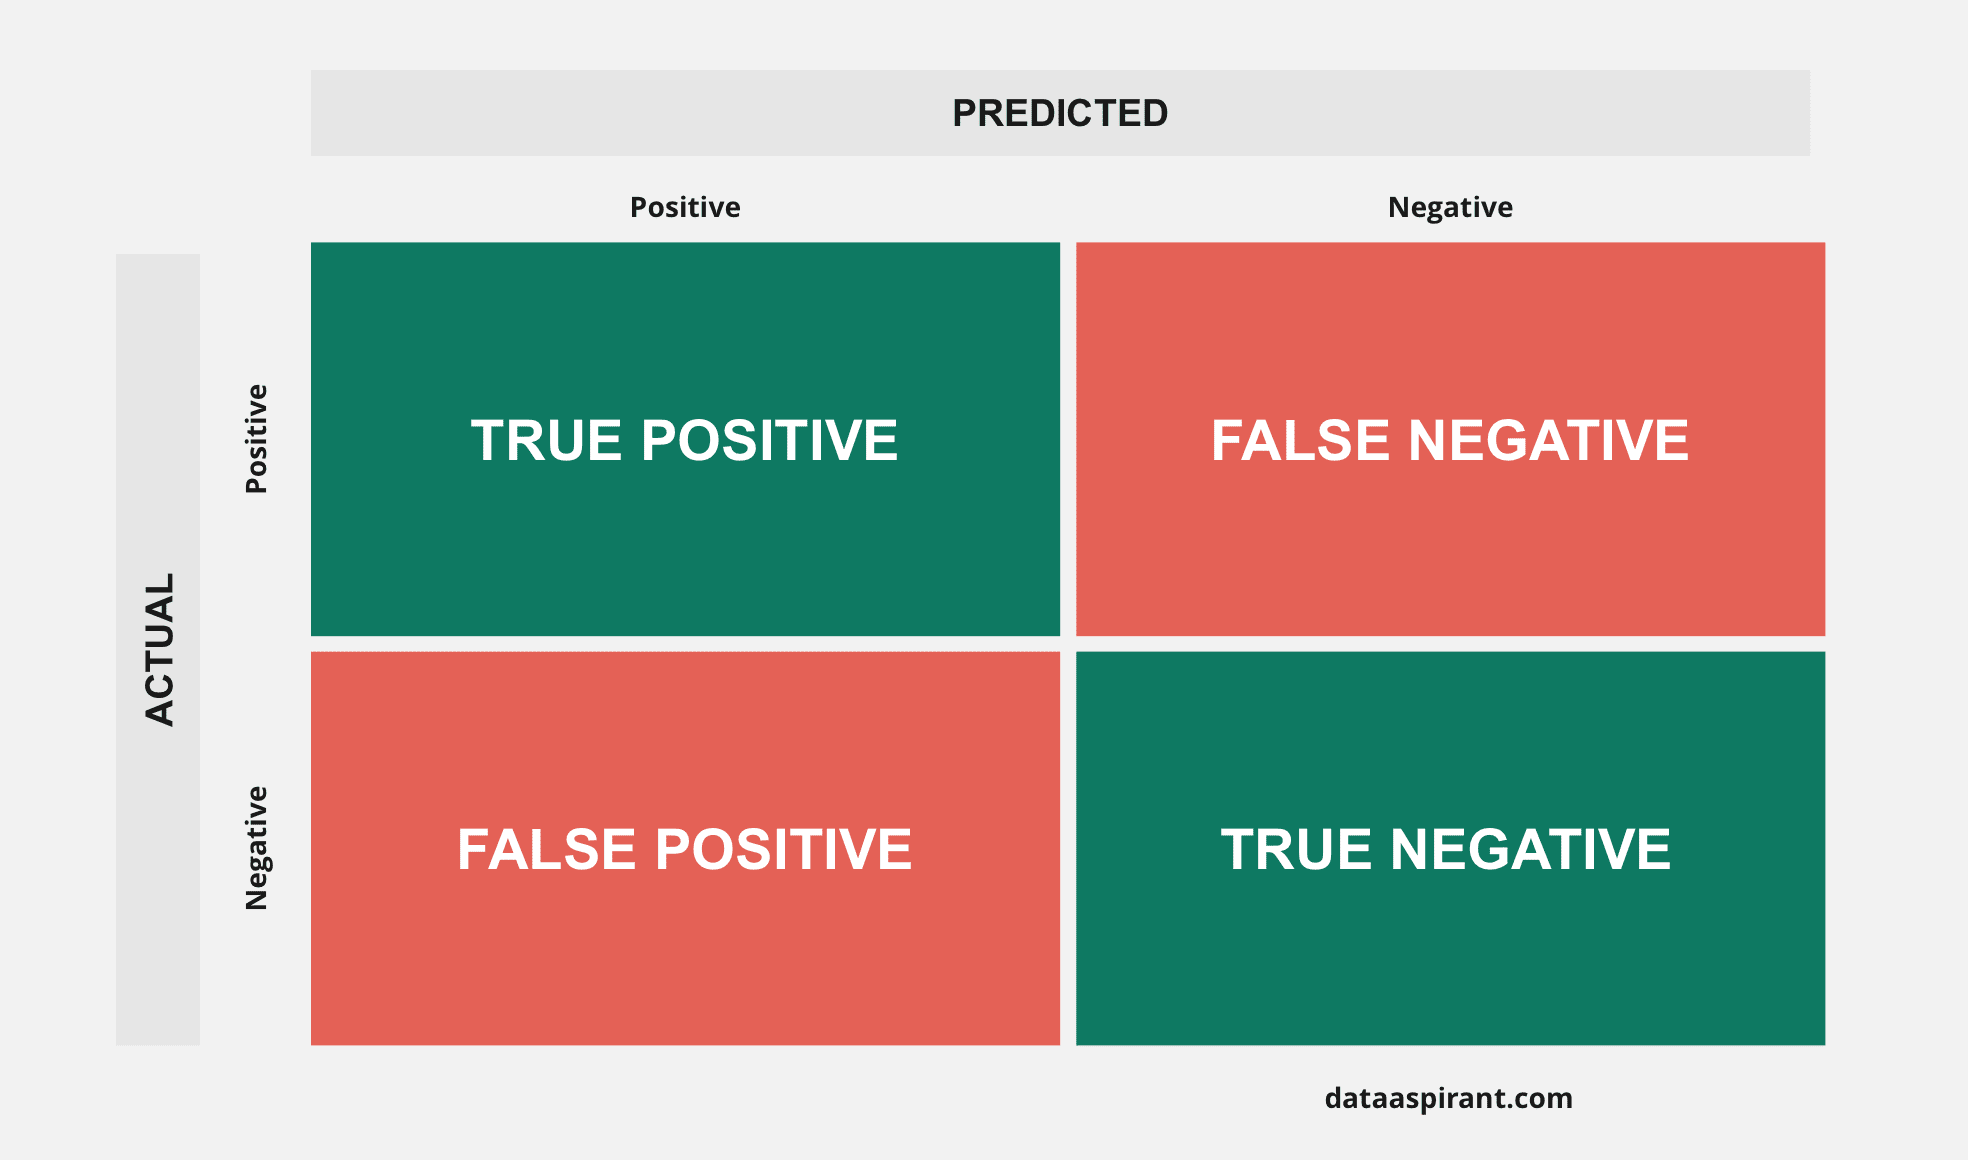

## `Sensitivity = TP/(TP + FN)`
## `Accuracy = (TP + TN)/(TP + TN + FP + FN)`
## `Precision = TP/(TP + FP)`
## `Recall = TP/(TP + FN)`
## `F Measure (F1) = 2 * Precision * Recall/(Precision + Recall)`
## `TPR (True Positive Rate) = TP/(TP + FN)`
## `TNR (True Negative Rate) = TN/(TN + FP)`
## `FPR (False Positive Rate) = FP/(TN + FP)`
## `FNR (False Negative Rate) = FN/(TP + FN)`

In [159]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

## 8.2 `Predicted Probability Calculation`

In [160]:
y_train_pred=Lr_model5.predict(X_train5)
y_train_pred

1871    0.523486
6795    0.113305
3516    0.336733
8105    0.818686
3934    0.292254
          ...   
350     0.857860
79      0.989779
8039    0.292254
6936    0.091708
5640    0.122790
Length: 6468, dtype: float64

In [161]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.52348619, 0.113305  , 0.33673309, ..., 0.292254  , 0.09170757,
       0.12279049])

In [162]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.523486,1871
1,0,0.113305,6795
2,0,0.336733,3516
3,0,0.818686,8105
4,0,0.292254,3934


## Creating new column 'predicted' with 1 if lead|_Prob > 0.5 else 0

In [163]:
y_train_pred_final['predicted(0.5)'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()
    

,Converted_IND,Converted_Prob,Prospect_IND,predicted(0.5)
0,0,0.523486,1871,1
1,0,0.113305,6795,0
2,0,0.336733,3516,0
3,0,0.818686,8105,1
4,0,0.292254,3934,0


In [164]:
matrix=confusion_matrix(y_true=y_train_pred_final['Converted_IND'],y_pred=y_train_pred_final['predicted(0.5)'])
matrix

array([[3548,  454],
       [ 717, 1749]], dtype=int64)

In [165]:
accuracy_score(y_true=y_train_pred_final['Converted_IND'],y_pred=y_train_pred_final['predicted(0.5)'])

0.8189548546691404

In [202]:
lg_metrics(matrix)

Model Accuracy value is              :  81.9 %
Model Sensitivity value is           :  70.92 %
Model Specificity value is           :  88.66 %
Model Precision value is             :  79.39 %
Model Recall value is                :  70.92 %
Model True Positive Rate (TPR)       :  70.92 %
Model False Positive Rate (FPR)      :  11.34 %
Model Poitive Prediction Value is    :  79.39 %
Model Negative Prediction value is   :  83.19 %


In [ ]:
draw_roc()

In [167]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,predicted(0.5),0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.523486,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.113305,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.336733,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.818686,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.292254,3934,0,1,1,1,0,0,0,0,0,0,0


In [168]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.632653,0.973236,0.422789,0.509554,0.973236
0.2,0.2,0.763760,0.916058,0.669915,0.631006,0.916058
0.3,0.3,0.800402,0.848743,0.770615,0.695118,0.848743
0.4,0.4,0.817718,0.775345,0.843828,0.753646,0.775345
0.5,0.5,0.818955,0.709246,0.886557,0.793917,0.709246
0.6,0.6,0.804267,0.613950,0.921539,0.828228,0.613950
0.7,0.7,0.785250,0.525142,0.945527,0.855915,0.525142
0.8,0.8,0.764069,0.431468,0.969015,0.895623,0.431468
0.9,0.9,0.713358,0.266423,0.988756,0.935897,0.266423


<Figure size 1800x864 with 0 Axes>

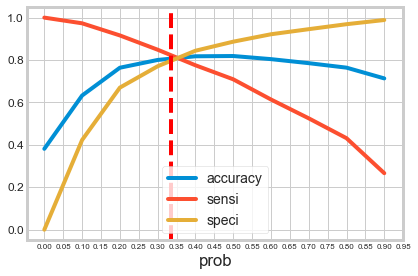

In [169]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(25,12))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

## `Inferences`:
- From the above graph, 0.335 seems to be ideal cut-off points

In [170]:
y_train_pred_final['final_predicted_1(0.35)'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,predicted(0.5),final_predicted_1(0.35)
0,0,0.523486,1871,1,1
1,0,0.113305,6795,0,0
2,0,0.336733,3516,0,1
3,0,0.818686,8105,1,1
4,0,0.292254,3934,0,0


In [171]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1(0.35)']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_IND,Converted_Prob,Prospect_IND,predicted(0.5),final_predicted_1(0.35),lead_score_1(0.35)
3115,1,0.999473,2656,1,1,99
4891,1,0.999463,8074,1,1,99
1229,0,0.999170,8057,1,1,99
6312,1,0.999102,3428,1,1,99
6187,1,0.998930,7579,1,1,99
...,...,...,...,...,...,...
2016,0,0.004609,976,0,0,0
4946,0,0.004449,3300,0,0,0
3282,0,0.004097,5381,0,0,0
1457,0,0.003618,5279,0,0,0


## 8.3 `Confusion Matrix`

In [172]:
#Plotting the Confusion Matrix
s=confusion_matrix( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1(0.35)'])
s

array([[3203,  799],
       [ 449, 2017]], dtype=int64)

In [173]:
lg_metrics(s)

Model Accuracy value is              :  80.71 %
Model Sensitivity value is           :  81.79 %
Model Specificity value is           :  80.03 %
Model Precision value is             :  71.63 %
Model Recall value is                :  81.79 %
Model True Positive Rate (TPR)       :  81.79 %
Model False Positive Rate (FPR)      :  19.97 %
Model Poitive Prediction Value is    :  71.63 %
Model Negative Prediction value is   :  87.71 %


In [174]:
# Classification Record : Precision, Recall and F1 Score
print(classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1(0.35)'] ) )

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4002
           1       0.72      0.82      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.81      0.81      6468



In [175]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1(0.35)'])))

F1 Score: 0.7637258614161304


## 8.4 `ROC Curve`

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [176]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [177]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted_IND, y_train_pred_final['final_predicted_1(0.35)'], drop_intermediate = False )


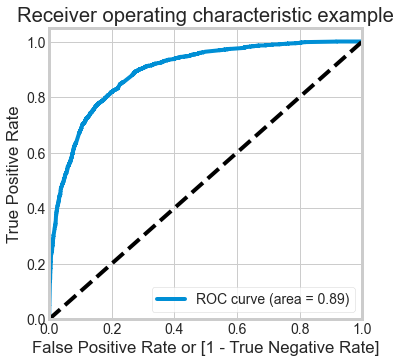

In [178]:
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

## `Inferences:`
- ROC Curve aread is 0.88, which indicates that the model is good.

## 8.5 `Precision - Recall Trade off`

- Next we will look into Precision- Recall trade off to see if balancing these values provides better output.
Precision means out of all leads which are predicted at 1, how many have truly converted.
Recall means out of all leads that have converted, how many of them were correctly identifies as 1. This is the same value as sensitivity.

- Precision-Recall trade-off point is used to decide the cut-off point especially when there is huge imbalance in data. In our case the data distribution is 62% vs 38%. So imbalance of data is not a big factor.

In [179]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

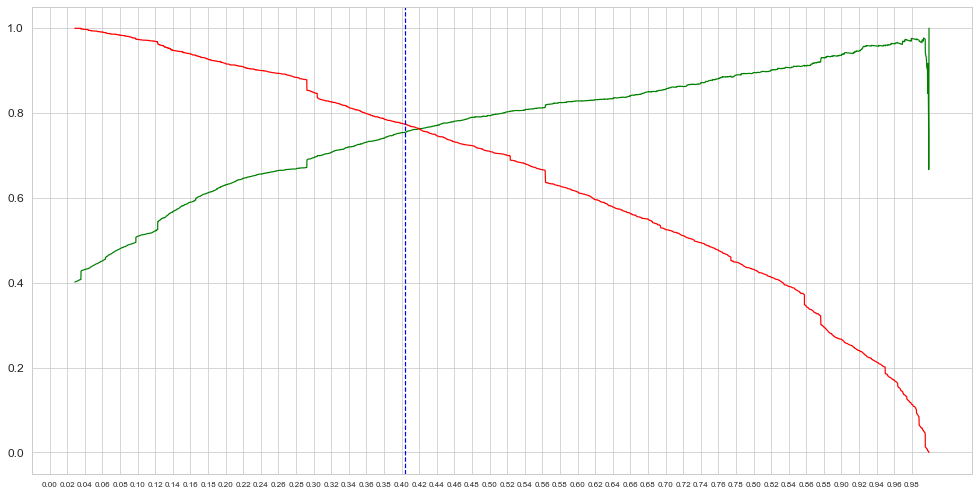

In [180]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

## `Inferences:`
- Based on Precision- Recall Trade off curve, the cutoff point seems to 0.40 We will use this threshold value for Test Data Evaluation

In [181]:
# plotting the Train dataset again with 0.40 as cutoff
y_train_pred_final['final_predicted_2(0.40)'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,predicted(0.5),final_predicted_1(0.35),lead_score_1(0.35),final_predicted_2(0.40)
0,0,0.523486,1871,1,1,52,1
1,0,0.113305,6795,0,0,11,0
2,0,0.336733,3516,0,1,33,0
3,0,0.818686,8105,1,1,81,1
4,0,0.292254,3934,0,0,29,0


In [182]:
confusion_matrix(y_train_pred_final['Converted_IND'],y_train_pred_final['final_predicted_2(0.40)'])

array([[3377,  625],
       [ 554, 1912]], dtype=int64)

In [183]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'],y_train_pred_final['final_predicted_2(0.40)'])
lg_metrics(conf_matrix)

Model Accuracy value is              :  81.77 %
Model Sensitivity value is           :  77.53 %
Model Specificity value is           :  84.38 %
Model Precision value is             :  75.36 %
Model Recall value is                :  77.53 %
Model True Positive Rate (TPR)       :  77.53 %
Model False Positive Rate (FPR)      :  15.62 %
Model Poitive Prediction Value is    :  75.36 %
Model Negative Prediction value is   :  85.91 %


In [184]:
# Classification Record : Precision, Recall and F1 Score
print(classification_report(y_train_pred_final['Converted_IND'],y_train_pred_final['final_predicted_2(0.40)']))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4002
           1       0.75      0.78      0.76      2466

    accuracy                           0.82      6468
   macro avg       0.81      0.81      0.81      6468
weighted avg       0.82      0.82      0.82      6468



## `Inferences:`
By using the Precision - Recall trade off chart cut-off points, the model output has changed the following way :
- True Positive number has decreased.
- True Negative number has increase
- False Negative number has increase
- False Positive number has decreased


For our purpose CEO wants to identify the people correctly who will convert to leads. Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive. We have to increase Sensitivity / Recall value to increase True Positives. Thus we will use 0.335 as cutoff point.

## 9. `Model Evalution : Test Dataset`

In [185]:
#scaling the test dataset
X_test[feature_scaling]=scaler.transform(X_test[feature_scaling])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
4269,0,1.749143,0.964504,2.117849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [186]:
# selecting the columns which used for final model datset
X_test=X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Hospitality Management,Specialization_Others,Occupation_Unknown,Occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9199,0,-0.885371,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4359,0,-0.885371,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [187]:
## adding the constant
X_test_sm_test=sm.add_constant(X_test)
X_test_sm_test.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Hospitality Management,Specialization_Others,Occupation_Unknown,Occupation_Working Professional
4269,1.0,0,0.964504,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2376,1.0,0,-0.885371,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7766,1.0,0,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9199,1.0,0,-0.885371,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4359,1.0,0,-0.885371,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [188]:
# Predicting the final test model 
y_test_pred=Lr_model5.predict(X_test_sm_test)
y_test_pred.head()

4269    0.510782
2376    0.876272
7766    0.835646
9199    0.097968
4359    0.857860
dtype: float64

In [189]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred,columns=['Converted_Prob'])
y_test_pred.head()

,Converted_Prob
4269,0.510782
2376,0.876272
7766,0.835646
9199,0.097968
4359,0.857860


In [190]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [191]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,Converted_Prob
0,1,4269,0.510782
1,1,2376,0.876272
2,1,7766,0.835646
3,0,9199,0.097968
4,1,4359,0.857860


In [192]:
# renaming the columns
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.510782
1,2376,1,0.876272
2,7766,1,0.835646
3,9199,0,0.097968
4,4359,1,0.857860


Now we will use Cutoff point of 0.335 from Sentivity - Specificity - Accuracy cut-off points

In [193]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.510782,1
1,2376,1,0.876272,1
2,7766,1,0.835646,1
3,9199,0,0.097968,0
4,4359,1,0.857860,1


In [194]:
s=confusion_matrix(y_pred_final['Converted_IND'],y_pred_final['final_predicted'])
s

array([[1341,  336],
       [ 199,  896]], dtype=int64)

In [195]:
lg_metrics(s)

Model Accuracy value is              :  80.7 %
Model Sensitivity value is           :  81.83 %
Model Specificity value is           :  79.96 %
Model Precision value is             :  72.73 %
Model Recall value is                :  81.83 %
Model True Positive Rate (TPR)       :  81.83 %
Model False Positive Rate (FPR)      :  20.04 %
Model Poitive Prediction Value is    :  72.73 %
Model Negative Prediction value is   :  87.08 %


In [197]:
# Classification Record : Precision, Recall and F1 Score
print(classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1677
           1       0.73      0.82      0.77      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.81      0.81      0.81      2772



## `Inferences:`
The sensitivity value on Test data is 81.83% vs 80.79% in Train data. The accuracy values is 80.7%. It shows that model is performing well in test data set also and is not over-trained.

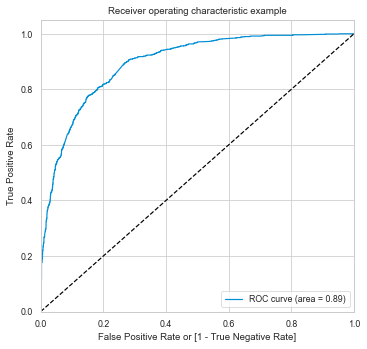

In [196]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

## `Inferences:`
ROC value of 0.89 shows the model is performing well in Test dataset.

In [198]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
546,3478,1,0.999437,1,99
2405,5921,1,0.998986,1,99
1026,5671,1,0.998734,1,99
745,6383,1,0.998423,1,99
2589,7327,1,0.997860,1,99
...,...,...,...,...,...
17,3545,0,0.006371,0,0
2034,2454,0,0.003632,0,0
2521,8733,0,0.003427,0,0
597,3682,0,0.002866,0,0


## `Inferences:`

We can use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert. If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted further to turn them into a potential customer. It is the same as increasing the precision value of the model by adjusting the cut-off point to a higher value. In case there are more resources available in the sales team (i.e., interns, etc. ), then the score cut-off can be lowered. As there are more human resources, the company can afford a higher rate of False positives as it will increase the customer outreach and, in turn, increase the potential customer who will take the online courses.

# 10.0 `Conclusion`

## 10.1 `Model Features/Predicators`

In [199]:
# Let's look into final model features and coefficients
final_parameters=Lr_model5.params[1:].round(2)
final_parameters

Do Not Email                            -1.18
Total Time Spent on Website              1.07
Lead Origin_Landing Page Submission     -1.02
Lead Origin_Lead Add Form                2.80
Lead Source_Olark Chat                   1.10
Lead Source_Welingak Website             2.46
Last Activity_Email Opened               0.73
Last Activity_Olark Chat Conversation   -0.61
Last Activity_Other Activity             2.24
Last Activity_SMS Sent                   1.87
Last Activity_Unreachable                0.85
Last Activity_Unsubscribed               1.39
Specialization_Hospitality Management   -1.00
Specialization_Others                   -0.98
Occupation_Unknown                      -1.08
Occupation_Working Professional          2.40
dtype: float64

In [200]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max()).round(2)
top_predictors

Do Not Email                             -42.0
Total Time Spent on Website               38.0
Lead Origin_Landing Page Submission      -36.0
Lead Origin_Lead Add Form                100.0
Lead Source_Olark Chat                    39.0
Lead Source_Welingak Website              88.0
Last Activity_Email Opened                26.0
Last Activity_Olark Chat Conversation    -22.0
Last Activity_Other Activity              80.0
Last Activity_SMS Sent                    67.0
Last Activity_Unreachable                 30.0
Last Activity_Unsubscribed                50.0
Specialization_Hospitality Management    -36.0
Specialization_Others                    -35.0
Occupation_Unknown                       -39.0
Occupation_Working Professional           86.0
dtype: float64

<Figure size 864x576 with 0 Axes>

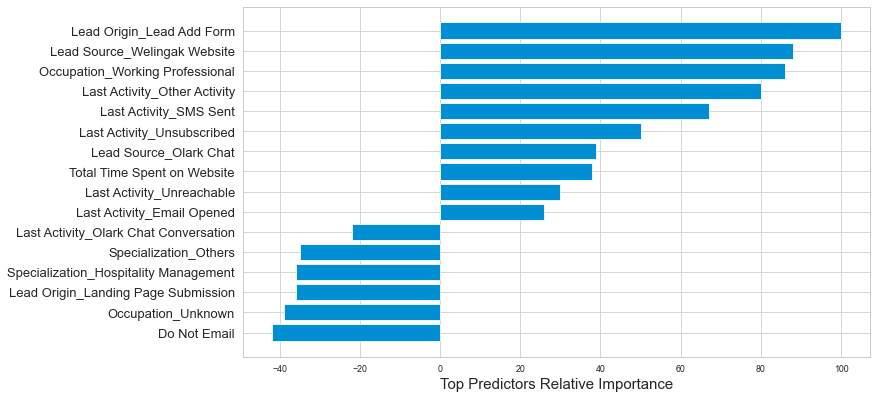

In [201]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()